# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data overview</a>
- <a href='#2'>2. Data Manipulation</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1. Customer attrition in data</a>
    - <a href='#3.2'>3.2. Varibles distribution in customer attrition</a>
    - <a href='#3.3'>3.3. Customer attrition in tenure groups</a>
    - <a href='#3.4'>3.4. Monthly Charges and Total Charges by Tenure and Churn  group</a>
    - <a href='#3.5'>3.5. Average Charges by tenure groups</a>
    - <a href='#3.6'>3.6. Monthly charges,total charges and tenure in customer attrition</a>
    - <a href='#3.7'>3.7. Variable Summary</a>
    - <a href='#3.8'>3.8. Correlation Matrix</a>
    - <a href='#3.9'>3.9. Visualising data with principal components</a>
    - <a href='#3.10'>3.10. Binary variables distribution in customer attrition(Radar Chart)</a>
- <a href='#4'>4. Data preprocessing</a>
- <a href='#5'>5. Model Building</a>
    - <a href='#5.1'>5.1. Baseline Model</a>
    - <a href='#5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
    - <a href='#5.3'>5.3. Recursive Feature Elimination</a>
    - <a href='#5.4'>5.4. Univariate Selection</a>
    - <a href='#5.5'>5.5. Decision Tree Visualization</a>
    - <a href='#5.6'>5.6. KNN Classifier</a>
    - <a href='#5.7'>5.7. Vizualising a decision tree from random forest classifier</a>
    - <a href='#5.8'>5.8. A random forest classifier.</a>
    - <a href='#5.9'>5.9. Gaussian Naive Bayes</a>
    - <a href='#5.10'>5.10. Support Vector Machine</a>
    - <a href='#5.11'>5.11. Tuning parameters for support vector machine</a>
    - <a href='#5.12'>5.12. LightGBMClassifier</a>
    - <a href='#5.13'>5.13. XGBoost  Classifier</a>
- <a href='#6'>6. Model Performances</a>
    - <a href='#6.1'>6.1. model performance metrics</a>
    - <a href='#6.2'>6.2. Compare model metrics</a>
    - <a href='#6.3'>6.3. Confusion matrices for models</a>
    - <a href='#6.4'>6.4. ROC - Curves  for models</a>
    - <a href='#6.5'>6.5. Precision recall curves</a>
   


In [3]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt #visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import random

# <a id='1'>1.Data</a>

In [4]:
filePath = "telco_customer_churn.csv"
telcom = pd.read_csv(filePath)
#first few rows
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## <a id='1.1'>1.1. Data overview</a>

In [5]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# <a id='2'>2. Data Manipulation</a>

In [6]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

telcom.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No   Tenure_0-12  
1               Mailed check          56.95      1889.50     No  Tenure_24-48  
2               Mailed check          53.85       108.15    Yes   Tenure_0-12  
3  Bank transfer (automatic)          42.30      1840.75     No  Tenure_24-48  
4           Electronic check          70.70       151.65    Yes   Tenure_0-12  

[5 rows x 22 columns]

# Data synthesizer

## Converts raw data to synthetic data by randomly altering values

In [7]:
def add_noise(df, syn_df, col):
    frac_noise = 0.1  # fraction of data randomized
    num_changes = int(np.ceil(frac_noise * df[col].size))
    bools = [True] * num_changes + [False] * (df[col].size - num_changes)
    np.random.shuffle(bools)          # randomly change value when True else retain  
    
    if (col in (cat_cols+target_col)):    # for categorical data
        categories = df[col].value_counts().keys().tolist()
        syn_df[col] = [random.choice(categories) if bools[i] else df[col][i] for i in range(df[col].size)]        
    elif (col in num_cols):    # for continuous, numeric data
        noise = np.random.normal(0,10,num_changes)
        syn_df[col] = [int(df[col][i] + random.choice(noise)) if bools[i] else df[col][i] for i in range(df[col].size)]  
    return syn_df

syn_telcom = telcom.copy(deep=True)
for x in telcom.columns.tolist():
    syn_telcom = add_noise(telcom, syn_telcom, x)

syn_telcom.head()
print("\n Raw features : \n", telcom.columns.tolist())
print("\n Syn Features : \n" ,syn_telcom.columns.tolist())


 Raw features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']

 Syn Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']


In [8]:
# Reinstantiating churn and not_churn for syn database
# Id_col, target_col, cat_cols, num_cols are the same
syn_churn     = syn_telcom[syn_telcom["Churn"] == "Yes"]
syn_not_churn = syn_telcom[syn_telcom["Churn"] == "No"]

print(churn.shape[0])
print(syn_churn.shape[0])

1869
1995


# <a id='3'>3. Exploratory Data Analysis</a>

## <a id='3.1'>3.1. Customer attrition in data</a>

In [9]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
# raw churn values
raw_val = telcom["Churn"].value_counts().values.tolist()
# syn churn values
syn_val = syn_telcom["Churn"].value_counts().values.tolist()

print(telcom["Churn"].value_counts())

raw_trace = go.Pie(labels = lab ,
                   values = raw_val ,
                   marker = dict(colors =  [ 'royalblue' ,'lime'],
                                 line = dict(color = "white",
                                             width =  1.3)
                                ),
                   rotation = 90,
                   domain  = dict(x = [0,.48]),                                      
                   hoverinfo = "label+value+text",
                   hole = .5,
                   name = "raw data"
                  )
syn_trace = go.Pie(labels = lab ,
                   values = syn_val ,
                   marker = dict(colors =  [ 'royalblue' ,'lime'],
                                 line = dict(color = "white",
                                             width =  1.3)
                                ),
                   rotation = 90,
                   domain  = dict(x = [.52,1]),                   
                   hoverinfo = "label+value+text",
                   hole = .5,
                   name = "syn data"
                  )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        ),
                        annotations = [dict(text = "raw data",
                                            font = dict(size = 13),
                                            showarrow = False,
                                            x = .20, y = .5),
                                       dict(text = "syn data",
                                            font = dict(size = 13),
                                            showarrow = False,
                                            x = .80,y = .5
                                            )
                                      ]
                   )
data = [raw_trace, syn_trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

No     5163
Yes    1869
Name: Churn, dtype: int64


## <a id='3.2'>3.2. Varibles distribution in customer attrition</a>

In [10]:
#function  for pie plot for customer attrition types
def plot_pie(column, churn, not_churn, data_type) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition in " + data_type + " data ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)    


#function  for histogram for customer attrition types
def histogram(column, churn, not_churn, data_type) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         )
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition in " + data_type + " data ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df, data_type)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition for " + data_type + " data ",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i, churn, not_churn, "raw")
    plot_pie(i, syn_churn, syn_not_churn, "syn")    
    
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i, churn, not_churn, "raw")
    histogram(i, syn_churn, syn_not_churn, "syn")    

#scatter plot matrix
scatter_matrix(telcom, "raw")
scatter_matrix(syn_telcom, "syn")

## <a id='3.3'>3.3. Customer attrition in tenure groups</a>

In [11]:
#cusomer attrition in tenure groups - raw data
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups - raw",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

#cusomer attrition in tenure groups - syn data
syn_tg_ch  =  syn_churn["tenure_group"].value_counts().reset_index()
syn_tg_ch.columns  = ["tenure_group","count"]
syn_tg_nch =  syn_not_churn["tenure_group"].value_counts().reset_index()
syn_tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = syn_tg_ch["tenure_group"]  , y = syn_tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = syn_tg_nch["tenure_group"] , y = syn_tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups - syn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

# <a id='4'>4. Data preprocessing</a>

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
syn_le = LabelEncoder()    
for i in bin_cols :
    syn_telcom[i] = syn_le.fit_transform(syn_telcom[i])
    
# Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )
syn_telcom = pd.get_dummies(data = syn_telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

std1 = StandardScaler()
scaled1 = std.fit_transform(syn_telcom[num_cols])
scaled1 = pd.DataFrame(scaled1, columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy(deep=True)
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

#dropping original values merging scaled values for numerical columns
syn_df_telcom_og = syn_telcom.copy(deep=True)
syn_telcom = syn_telcom.drop(columns = num_cols,axis = 1)
syn_telcom = syn_telcom.merge(scaled1,left_index=True,right_index=True,how = "left")

# syn_telcom.head()

print("\n Raw features : \n", telcom.columns.tolist())
print("\n Syn features : \n", syn_telcom.columns.tolist())


 Raw features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure', 'MonthlyCharges', 'TotalCharges']

 Syn features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Pape

## <a id='3.7'>3.7. Variable Summary</a>

In [14]:
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

print([i for i in df_telcom_og.columns if i not in Id_col])

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60']


In [15]:
syn_summary = (syn_telcom[[i for i in syn_telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

syn_summary = syn_summary.rename(columns = {"index" : "feature"})
syn_summary = np.around(syn_summary,3)

syn_val_lst = [syn_summary['feature'], syn_summary['count'],
           syn_summary['mean'], syn_summary['std'],
           syn_summary['min'], syn_summary['25%'],
           syn_summary['50%'], syn_summary['75%'], syn_summary['max']]

syn_trace  = go.Table(header = dict(values = syn_summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = syn_val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
syn_layout = go.Layout(dict(title = "Synthetic variable summary"))
syn_figure = go.Figure(data=[syn_trace],layout=syn_layout)
py.iplot(syn_figure)

## <a id='3.8'>3.8. Correlation Matrix</a>

In [16]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#correlation
syn_correlation = syn_telcom.corr()
#tick labels
syn_matrix_cols = syn_correlation.columns.tolist()
#convert to array
syn_corr_array  = np.array(syn_correlation)

#Plotting
syn_trace = go.Heatmap(z = syn_corr_array,
                   x = syn_matrix_cols,
                   y = syn_matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

syn_layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

syn_data = [syn_trace]
syn_fig = go.Figure(data=syn_data,layout=syn_layout)
py.iplot(syn_fig)

## <a id='3.9'>3.9. Visualising data with principal components</a>

In [17]:
from sklearn.decomposition import PCA

def pca_scatter(target,color,df) :
    tracer = go.Scatter(x = df[df["Churn"] == target]["PC1"] ,
                        y = df[df["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                df[df["Churn"] == target]['customerID'])
                       )
    return tracer

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red', pca_data)
trace2 = pca_scatter("Not Churn",'royalblue', pca_data)
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

syn_X = syn_telcom[[i for i in syn_telcom.columns if i not in Id_col + target_col]]
syn_Y = syn_telcom[target_col + Id_col]

syn_principal_components = pca.fit_transform(syn_X)
syn_pca_data = pd.DataFrame(syn_principal_components,columns = ["PC1","PC2"])
syn_pca_data = syn_pca_data.merge(syn_Y,left_index=True,right_index=True,how="left")
syn_pca_data["Churn"] = syn_pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

syn_layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
syn_trace1 = pca_scatter("Churn",'red', syn_pca_data)
syn_trace2 = pca_scatter("Not Churn",'royalblue', syn_pca_data)
syn_data = [syn_trace2,syn_trace1]
syn_fig = go.Figure(data=syn_data,layout=syn_layout)
py.iplot(syn_fig)

# <a id='5'>5. Model Building</a>
## <a id='5.1'>5.1. Baseline Model</a>

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.69      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      1232
           1       0.67      0.44      0.53       526

    accuracy                           0.77      1758
   macro avg       0.73      0.67      0.69      1758
weighted avg

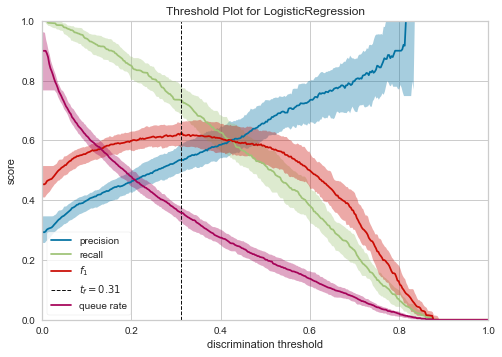

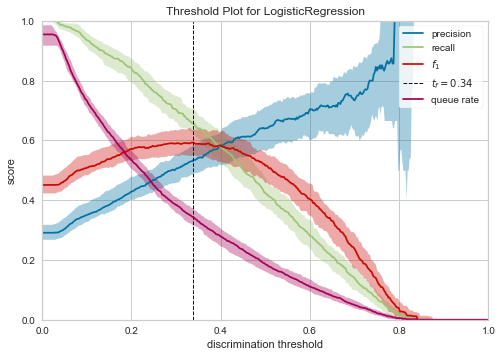

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test data 
train,test,syn_train,syn_test = train_test_split(telcom,syn_telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

syn_train_X = syn_train[cols]
syn_train_Y = syn_train[target_col]
syn_test_X  = syn_test[cols]
syn_test_Y  = syn_test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,syn_training_x,syn_testing_x,
                             syn_training_y,syn_testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    algorithm.fit(syn_training_x,syn_training_y)
    syn_predictions   = algorithm.predict(syn_testing_x)
    syn_probabilities = algorithm.predict_proba(syn_testing_x)
    #coeffs
    if   cf == "coefficients" :
        syn_coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        syn_coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    syn_column_df     = pd.DataFrame(cols)
    syn_coef_sumry    = (pd.merge(syn_coefficients,syn_column_df,left_index= True,
                              right_index= True, how = "left"))
    syn_coef_sumry.columns = ["coefficients","features"]
    syn_coef_sumry    = syn_coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print(algorithm)
    print("\n Classification report for raw data : \n",classification_report(testing_y,predictions))
    print("\n Classification report for syn data : \n",classification_report(syn_testing_y,syn_predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    syn_conf_matrix = confusion_matrix(syn_testing_y,syn_predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    syn_model_roc_auc = roc_auc_score(syn_testing_y,syn_predictions) 
    print ("Area under curve for raw data : ",model_roc_auc,"\n")
    print ("Area under curve for syn data : ",syn_model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    syn_fpr,syn_tpr,syn_thresholds = roc_curve(syn_testing_y,syn_probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    syn_trace1 = go.Heatmap(z = syn_conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    syn_trace2 = go.Scatter(x = syn_fpr,y = syn_tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))  
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))    
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    syn_trace4 = go.Bar(x = syn_coef_sumry["features"],y = syn_coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))    
    
    #subplots
    fig = tls.make_subplots(rows=4, cols=2, specs=[[{}, {}], [{}, {}], [{'colspan': 2}, None], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix - Raw',
                                            'Receiver operating characteristic - Raw','Confusion Matrix - Syn',
                                            'Receiver operating characteristic - Syn',
                                            'Feature Importances - Raw',
                                            'Feature Importances - Syn'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(syn_trace1,2,1)
    fig.append_trace(syn_trace2,2,2)
    fig.append_trace(trace3,2,2)    
    fig.append_trace(trace4,3,1)
    fig.append_trace(syn_trace4,4,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 2500,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        visualizer1 = DiscriminationThreshold(algorithm)        
        visualizer1.fit(syn_training_x,syn_training_y)
        visualizer1.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,syn_train_X,syn_test_X,syn_train_Y,syn_test_Y,
                         cols,"coefficients",threshold_plot = True)

## <a id='5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

Using TensorFlow backend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1268
           1       0.54      0.79      0.64       490

    accuracy                           0.75      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.75      0.76      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      1232
           1       0.54      0.73      0.62       526

    accuracy                           0.73      1758
   macro avg       0.70      0.73      0.70      1758
weighted avg

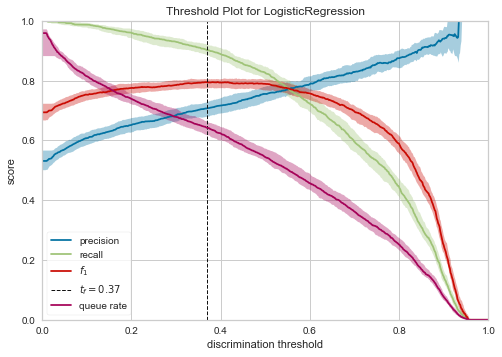

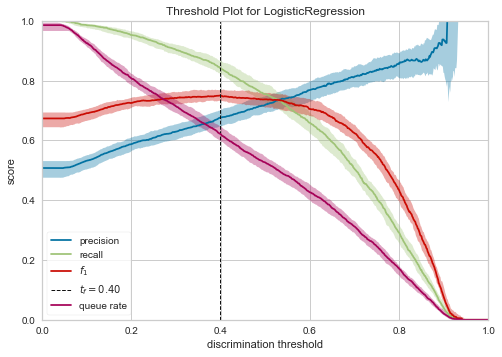

In [19]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in telcom.columns if i not in Id_col+target_col]

smote_X = telcom[cols]
smote_Y = telcom[target_col]

syn_smote_X = syn_telcom[cols]
syn_smote_Y = syn_telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,syn_smote_train_X,syn_smote_test_X,syn_smote_train_Y,syn_smote_test_Y = train_test_split(smote_X,smote_Y,syn_smote_X,
                                                                         syn_smote_Y,test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

syn_os_smote_X,syn_os_smote_Y = os.fit_sample(syn_smote_train_X,syn_smote_train_Y)
syn_os_smote_X = pd.DataFrame(data = syn_os_smote_X,columns=cols)
syn_os_smote_Y = pd.DataFrame(data = syn_os_smote_Y,columns=target_col)
###

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                         cols,"coefficients",threshold_plot = True)


## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.


 Are features selected same? : 
 True
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1268
           1       0.56      0.79      0.66       490

    accuracy                           0.77      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.81      0.77      0.78      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1232
           1       0.53      0.73      0.61       526

    accuracy                           0.73      1758
   macro avg       0.70    

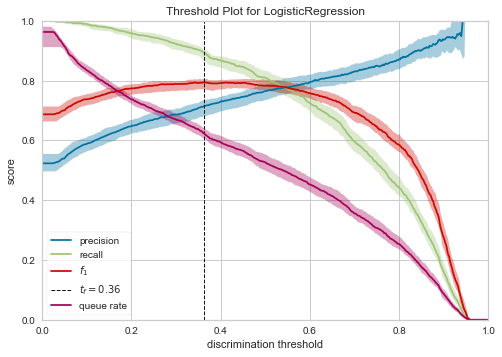

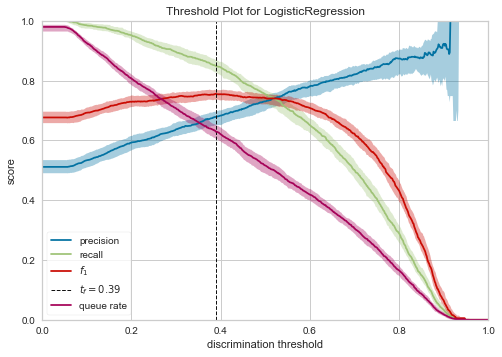

In [20]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe_model = RFE(logit,10)
rfe = rfe_model.fit(os_smote_X,os_smote_Y.values.ravel())
syn_rfe = rfe_model.fit(syn_os_smote_X,syn_os_smote_Y.values.ravel())

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in telcom.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

syn_idc_rfe = pd.DataFrame({"rfe_support" :syn_rfe.support_,
                       "columns" : [i for i in telcom.columns if i not in Id_col + target_col],
                       "ranking" : syn_rfe.ranking_,
                      })
syn_cols = syn_idc_rfe[syn_idc_rfe["rfe_support"] == True]["columns"].tolist()

print("\n Are features selected same? : \n", cols == syn_cols)

#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

syn_train_rf_X = syn_os_smote_X[syn_cols]
syn_train_rf_Y = syn_os_smote_Y
syn_test_rf_X  = syn_test[syn_cols]
syn_test_rf_Y  = syn_test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,syn_train_rf_X,syn_test_rf_X,syn_train_rf_Y,syn_test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)
syn_tab_rk = ff.create_table(syn_idc_rfe)
py.iplot(syn_tab_rk)

## <a id='5.4'>5.4. Univariate Selection</a>
* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared (chi^2) statistical test for non-negative features to select the best features

In [21]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in telcom.columns if i not in Id_col + target_col ]

#dataframe with non negative values
df_x = df_telcom_og[cols]
df_y = df_telcom_og[target_col]

syn_df_x = syn_df_telcom_og[cols]
syn_df_y = syn_df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = f_classif,k = 3)
fit    = select.fit(df_x,df_y)

syn_select = SelectKBest(score_func = f_classif,k = 3)
syn_fit    = select.fit(syn_df_x,syn_df_y)

#Summarize scores
print ("scores")
print (fit.scores_)
print ("Syn scores")
print (syn_fit.scores_)
print ("Raw P - Values")
print (fit.pvalues_)
print ("Syn P - Values")
print (syn_fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)

syn_score = pd.DataFrame({"features":cols,"scores":syn_fit.scores_,"p_values":syn_fit.pvalues_ })
syn_score = syn_score.sort_values(by = "scores" ,ascending =False)

#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")
syn_score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for raw Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#syn plot
syn_trace  = go.Scatter(x = syn_score[syn_score["feature_type"] == "Categorical"]["features"],
                    y = syn_score[syn_score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

syn_trace1 = go.Bar(x = syn_score[syn_score["feature_type"] == "Numerical"]["features"],
                y = syn_score[syn_score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )

syn_layout = go.Layout(dict(title = "Scores for synthetic Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

syn_data=[syn_trace,syn_trace1]
syn_fig = go.Figure(data=syn_data,layout=syn_layout)
py.iplot(syn_fig)

scores
[1.52185182e-01 6.25997738e+01 9.97078791e+01 1.13872513e+02
 5.95873187e+00 1.41699817e+02 3.33342521e+01 2.00805641e+01
 1.38823164e+02 1.82040856e+01 2.18095220e+01 1.67015024e+02
 1.35035353e+00 2.10866532e+00 4.58356194e+00 7.24859056e+01
 4.53622026e+02 2.27198144e+02 8.20687010e+02 1.46486133e+02
 4.15318387e+02 4.02729402e+01 1.04141235e+02 4.09425012e+02
 3.15869579e+01 4.91615776e+02 1.41428741e+00 2.38043925e+01
 4.07229004e+01 2.37568961e+02 7.61563638e+02 2.22077893e+02
 2.25402130e+02]
Syn scores
[1.52185182e-01 6.25997738e+01 9.97078791e+01 1.13872513e+02
 5.95873187e+00 1.41699817e+02 3.33342521e+01 2.00805641e+01
 1.38823164e+02 1.82040856e+01 2.18095220e+01 1.67015024e+02
 1.35035353e+00 2.10866532e+00 4.58356194e+00 7.24859056e+01
 4.53622026e+02 2.27198144e+02 8.20687010e+02 1.46486133e+02
 4.15318387e+02 4.02729402e+01 1.04141235e+02 4.09425012e+02
 3.15869579e+01 4.91615776e+02 1.41428741e+00 2.38043925e+01
 4.07229004e+01 2.37568961e+02 7.61563638e+02 2.22

## <a id='5.5'>5.5. Decision Tree Visualization</a>
* Using top three numerical features

True


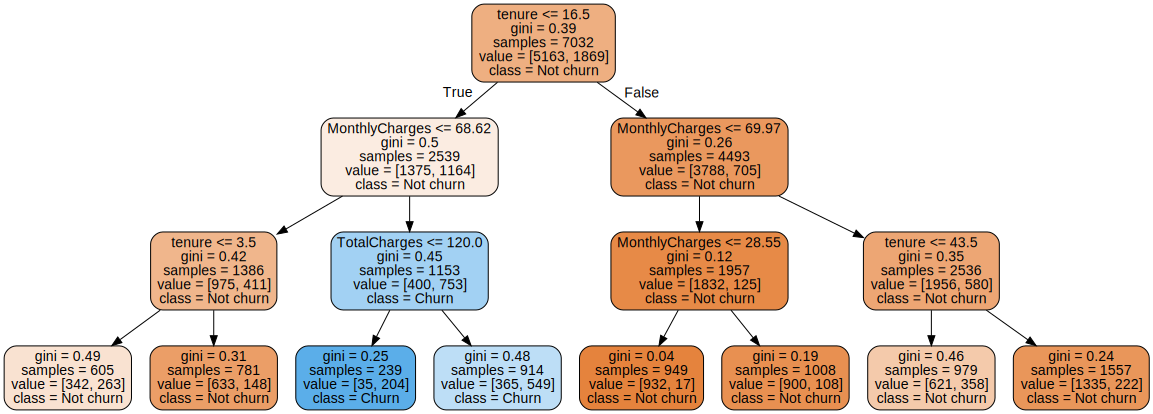

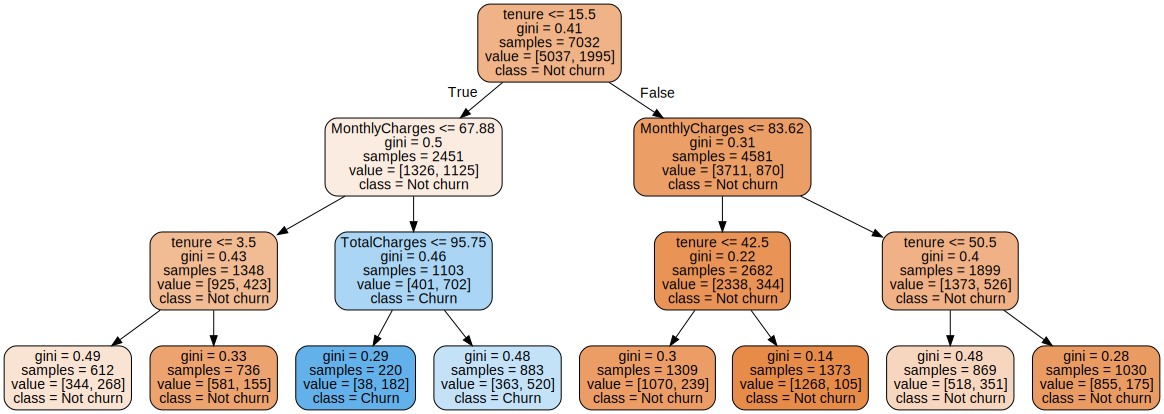

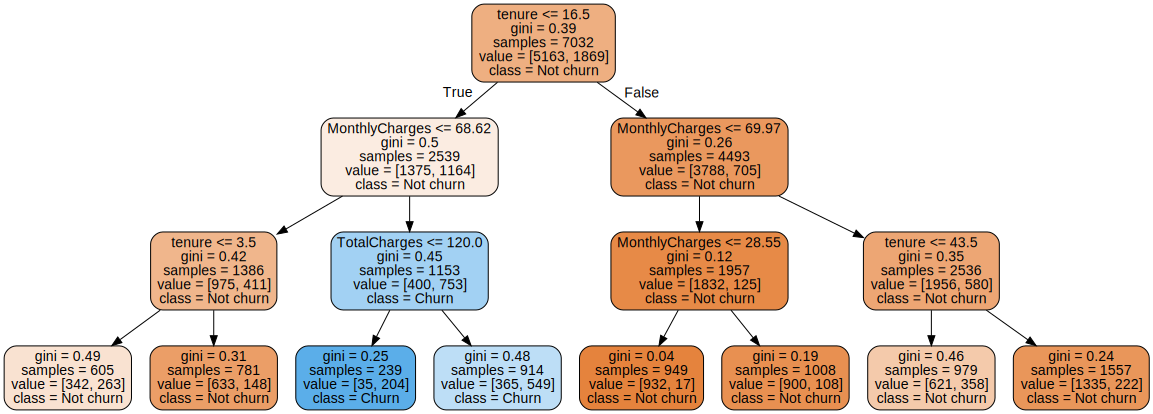

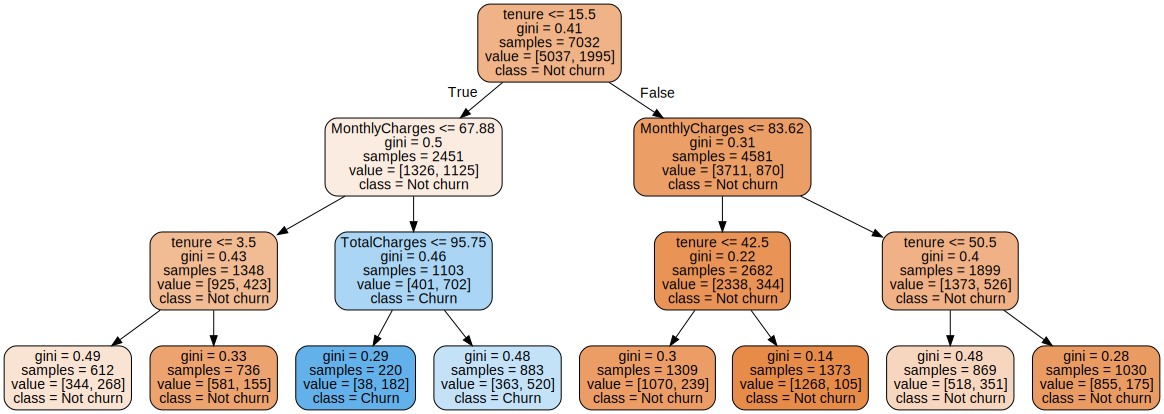

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()
syn_features_cat  = syn_score[syn_score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()
syn_features_num  = syn_score[syn_score["feature_type"] == "Numerical"]["features"][:3].tolist()

#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    syn_dtc_x = syn_df_x[columns]
    syn_dtc_y = syn_df_y[target_col]    
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    
    syn_dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )    
    
    dt_classifier.fit(dtc_x,dtc_y)
    
    syn_dt_classifier.fit(syn_dtc_x,syn_dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    syn_graph = Source(tree.export_graphviz(syn_dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )    
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 syn_dtc_x,syn_test_X[columns],
                                 syn_dtc_y,syn_test_Y,                                 
                                 columns,"features",threshold_plot = True)
    display(graph)
    display(syn_graph)

print(features_num == syn_features_num)
plot_decision_tree(features_num,3,"gini","best")
plot_decision_tree(syn_features_num,3,"gini","best")

### * Using top three categorical features

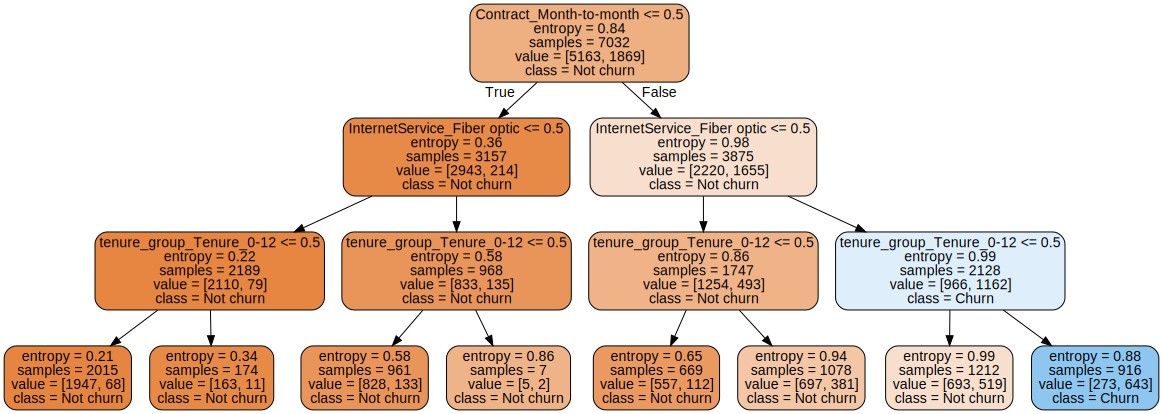

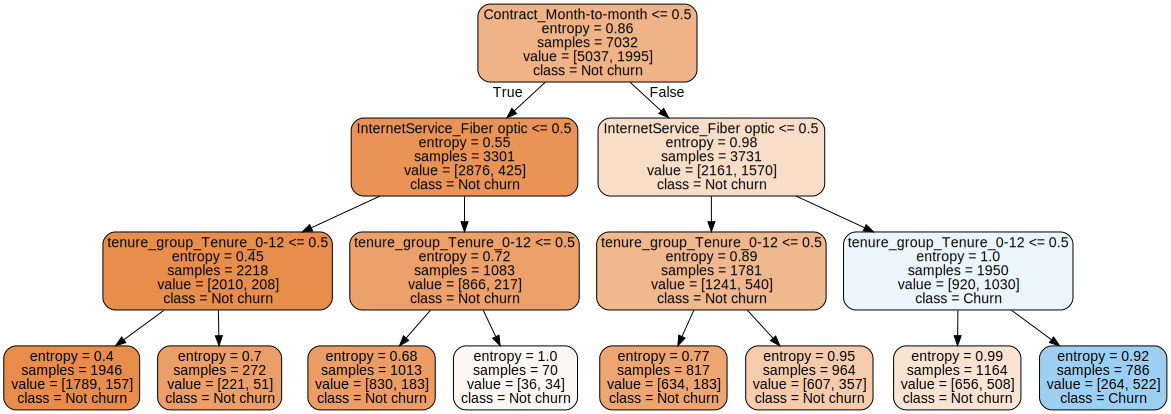

In [23]:
plot_decision_tree(features_cat,3,"entropy","best")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79      1268
           1       0.50      0.66      0.57       490

    accuracy                           0.72      1758
   macro avg       0.68      0.70      0.68      1758
weighted avg       0.75      0.72      0.73      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1232
           1       0.49      0.58      0.53       526

    accuracy             

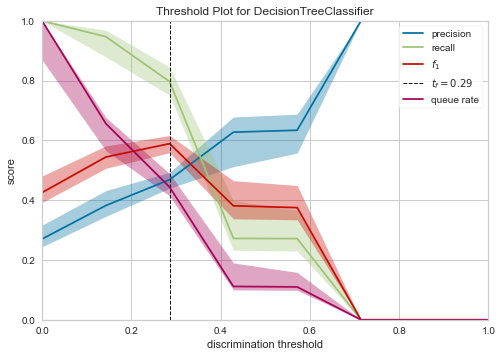

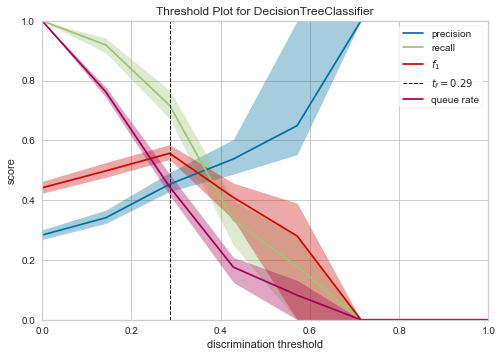

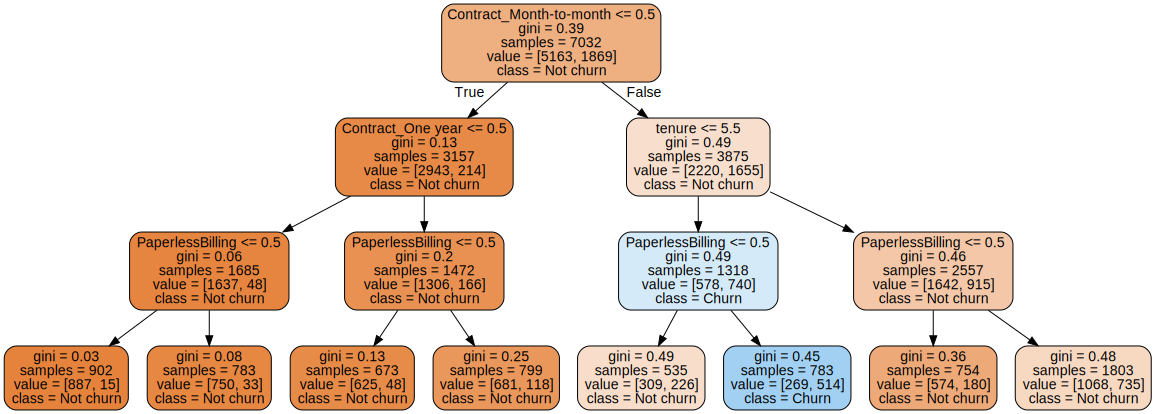

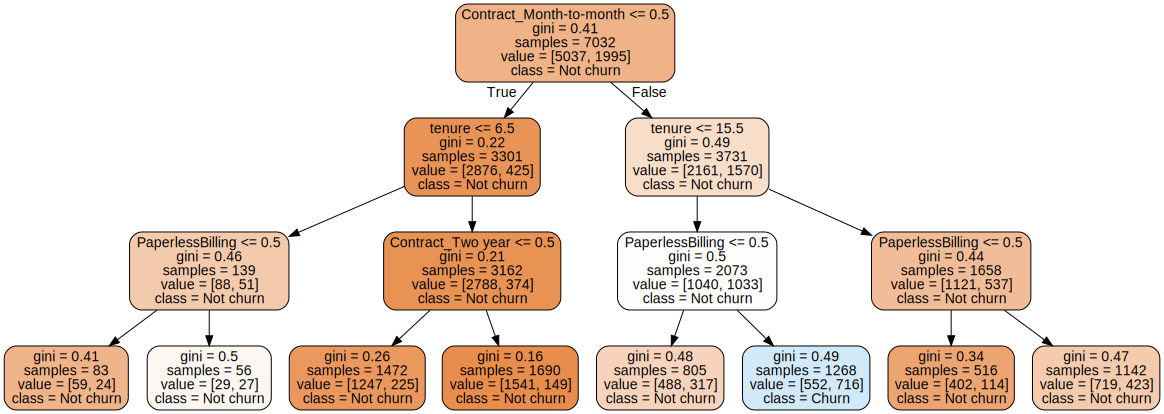

In [24]:
#using contract,tenure and paperless billing variables
columns = ['tenure','Contract_Month-to-month', 'PaperlessBilling',
           'Contract_One year', 'Contract_Two year']

plot_decision_tree(columns,3,"gini","best",model_performance= True)

## <a id='5.6'>5.6. KNN Classifier</a>
* Applying knn algorithm to smote  oversampled data.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report for raw data: 
               precision    recall  f1-score   support

           0       0.86      0.69      0.77      1268
           1       0.47      0.72      0.57       490

    accuracy                           0.70      1758
   macro avg       0.67      0.70      0.67      1758
weighted avg       0.75      0.70      0.71      1758


 Classification report for syn data: 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1232
           1       0.49      0.66      0.56       526

    accuracy                           0.69      1758
   macro avg       0.66      0.68      0.66      1758
weighted avg       0.73      0.69      0.70      1758

Accuracy Score for raw data:  0.699089874857793
Accuracy Score for syn data:  0.68

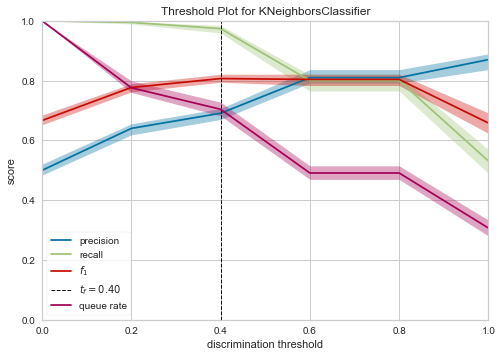

In [25]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,syn_training_x,syn_testing_x,
                                 syn_training_y,syn_testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    syn_predictions   = algorithm.predict(syn_testing_x)
    syn_probabilities = algorithm.predict_proba(syn_testing_x)    
    
    print (algorithm)
    print ("\n Classification report for raw data: \n",classification_report(testing_y,predictions))
    print ("\n Classification report for syn data: \n",classification_report(syn_testing_y,syn_predictions))
    print ("Accuracy Score for raw data: ",accuracy_score(testing_y,predictions))
    print ("Accuracy Score for syn data: ",accuracy_score(syn_testing_y,syn_predictions))    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    syn_conf_matrix = confusion_matrix(syn_testing_y,syn_predictions)    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    syn_model_roc_auc = roc_auc_score(syn_testing_y,syn_predictions)     
    print ("Area under curve for raw data: ",model_roc_auc)
    print ("Area under curve for syn data: ",syn_model_roc_auc)    
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    syn_fpr, syn_tpr, syn_thresholds = roc_curve(syn_testing_y,syn_probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    syn_trace1 = go.Scatter(x = syn_fpr,y = syn_tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    syn_trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    syn_trace3 = go.Heatmap(z = syn_conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    syn_layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    syn_data = [syn_trace1,syn_trace2,syn_trace3]
    syn_fig = go.Figure(data=syn_data,layout=syn_layout)
    
    py.iplot(fig)
    py.iplot(syn_fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,
                             syn_os_smote_Y,syn_test_Y,threshold_plot = True)

## <a id='5.7'>5.7. Vizualising a decision tree from random forest classifier</a>

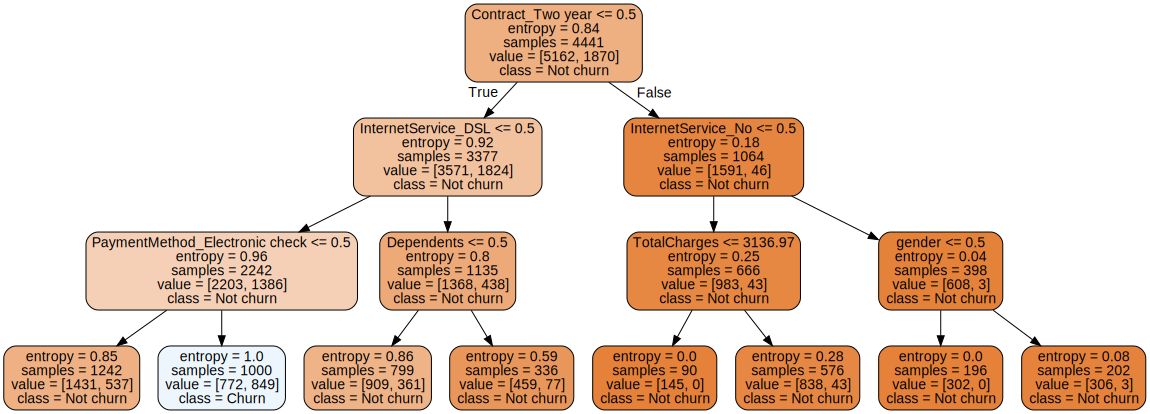

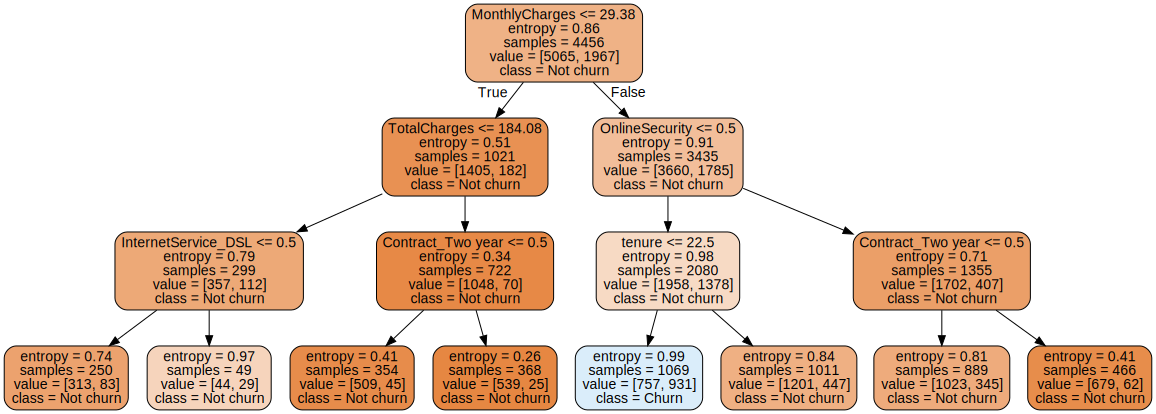

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.77      0.97      0.85      1268
           1       0.73      0.23      0.35       490

    accuracy                           0.76      1758
   macro avg       0.75      0.60      0.60      1758
weighted avg       0.76      0.76      0.71      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.73      0.97      0.83  

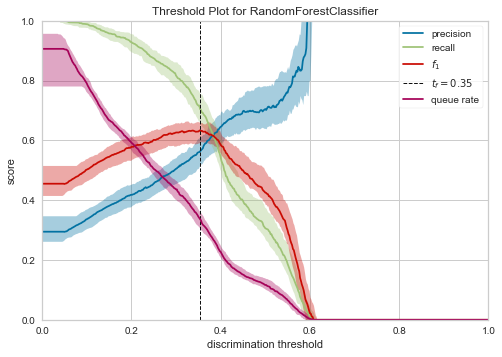

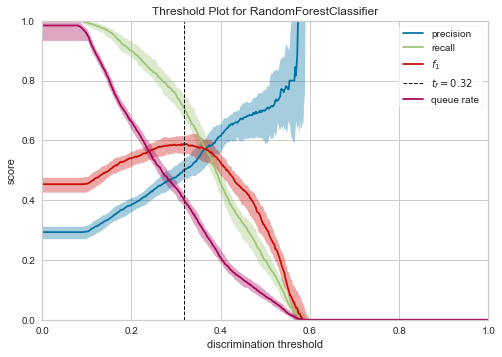

In [27]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_telcom_og[columns + target_col].copy(deep=True)
    syn_dataframe = syn_df_telcom_og[columns + target_col].copy(deep=True)
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    syn_rf_x     = syn_dataframe[[i for i in columns if i not in target_col]]
    syn_rf_y     = syn_dataframe[target_col]    
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree_ = rfc.estimators_[estimated_tree]
    
    syn_rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    syn_rfc.fit(syn_rf_x,syn_rf_y)
    
    syn_estimated_tree_ = syn_rfc.estimators_[estimated_tree]    
    
    graph = Source(tree.export_graphviz(estimated_tree_,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    syn_graph = Source(tree.export_graphviz(syn_estimated_tree_,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(syn_graph)    
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_x,test_X[columns],
                                 rf_y,test_Y,
                                 syn_rf_x,syn_test_X[columns],
                                 syn_rf_y,syn_test_Y,
                                 columns,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

## <a id='5.8'>5.8. A random forest classifier.</a>
* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three  for each tree. Each tree produced is slightly different from other.

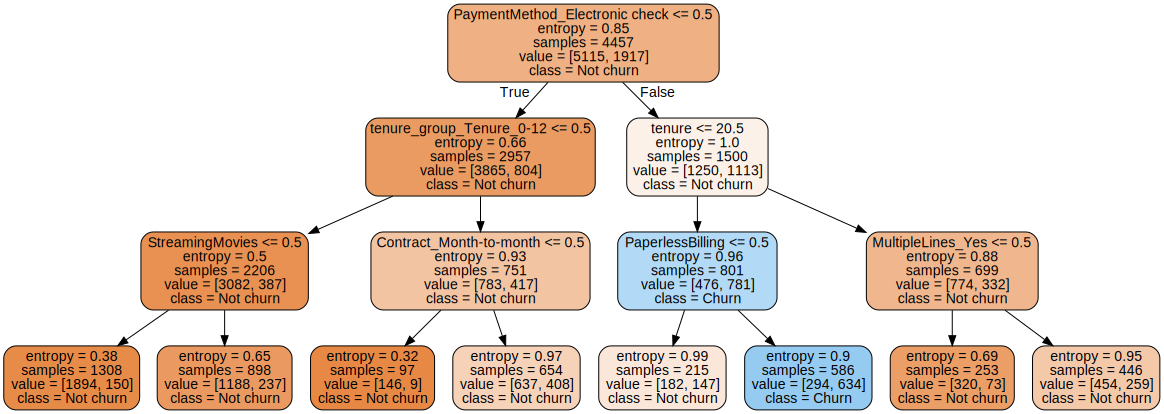

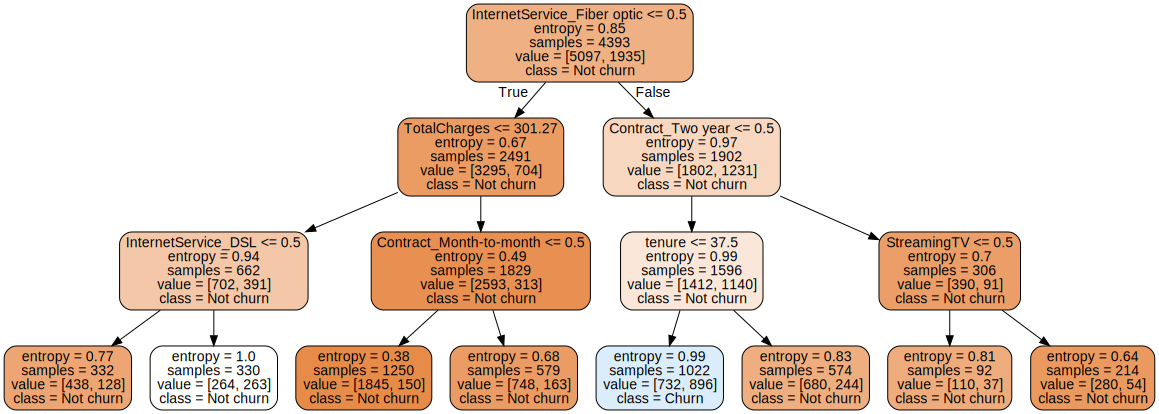

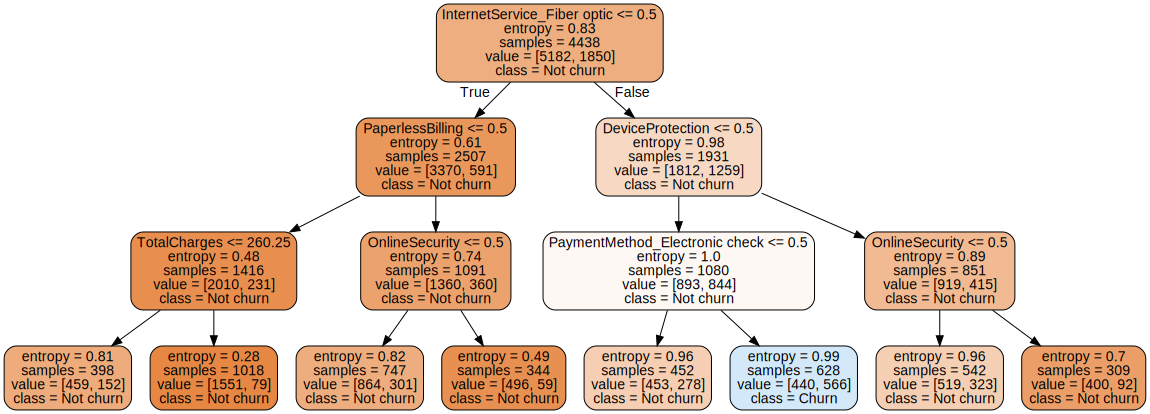

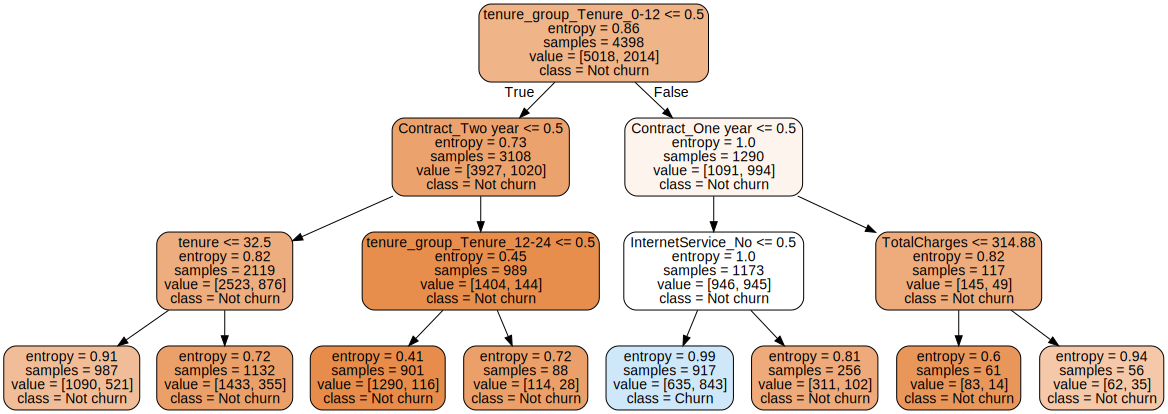

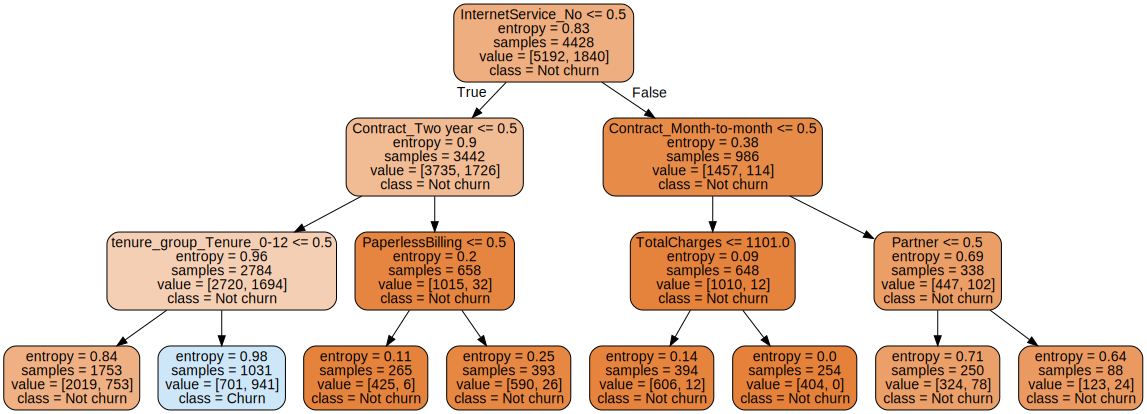

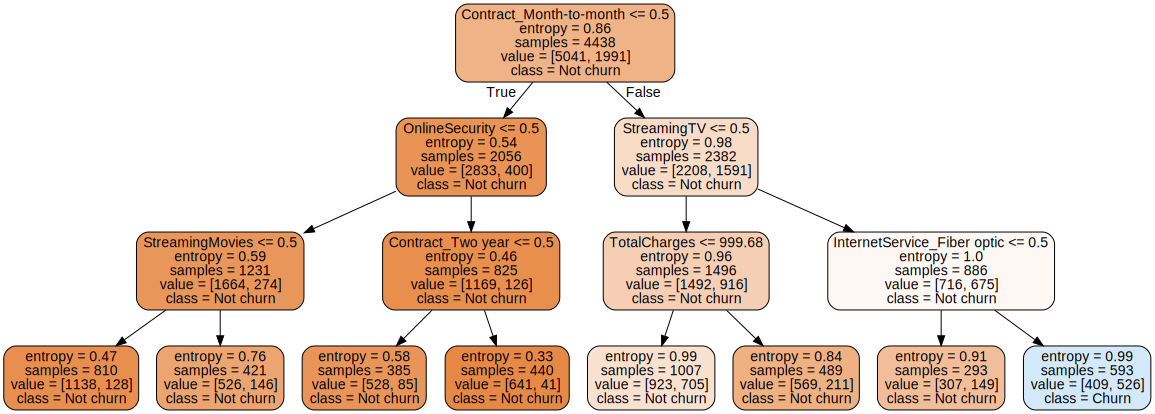

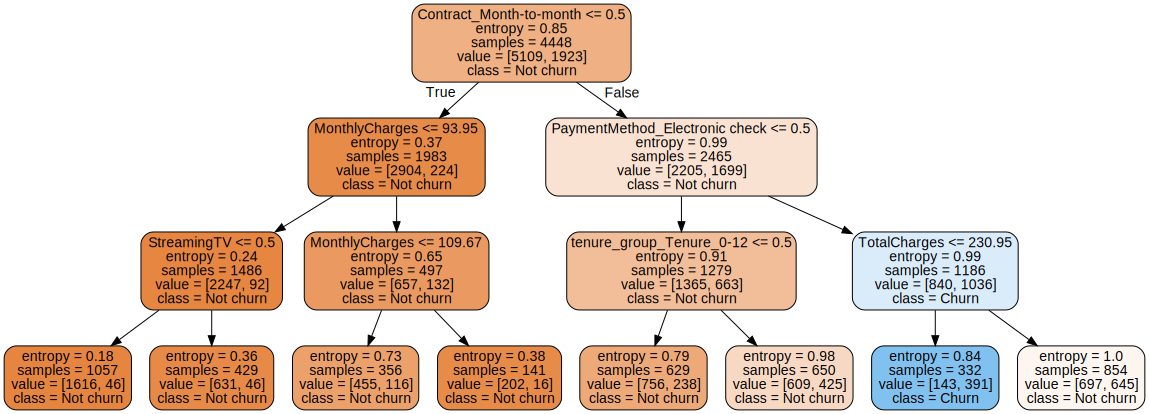

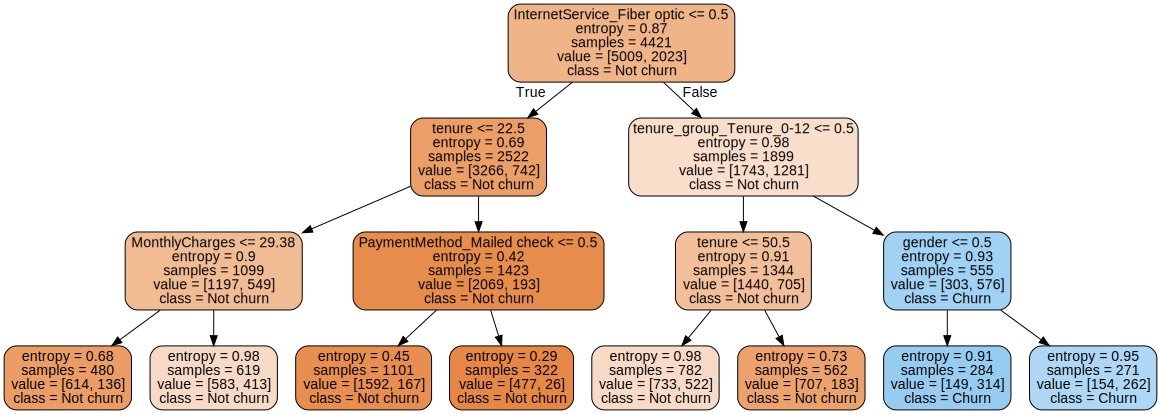

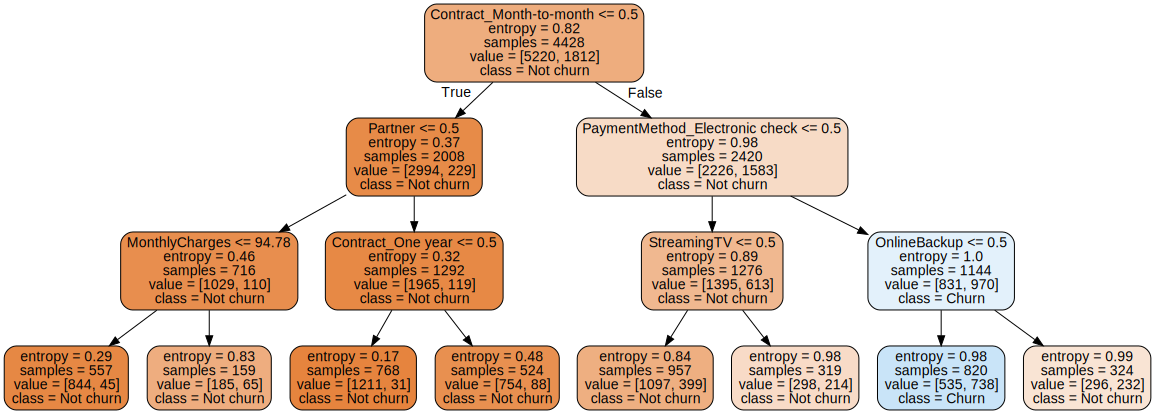

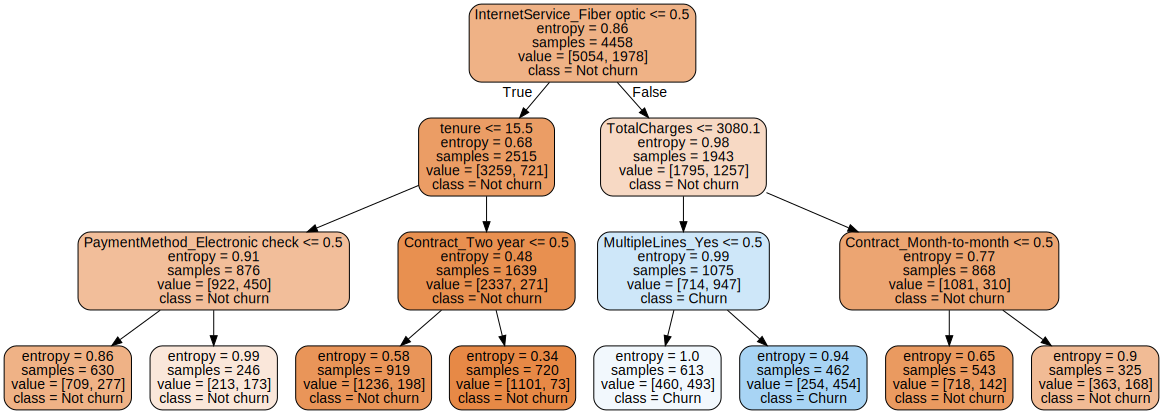

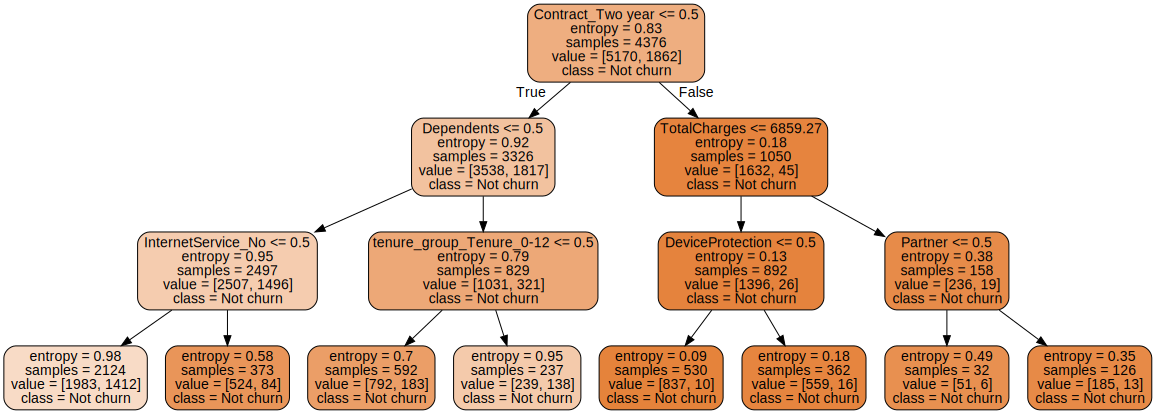

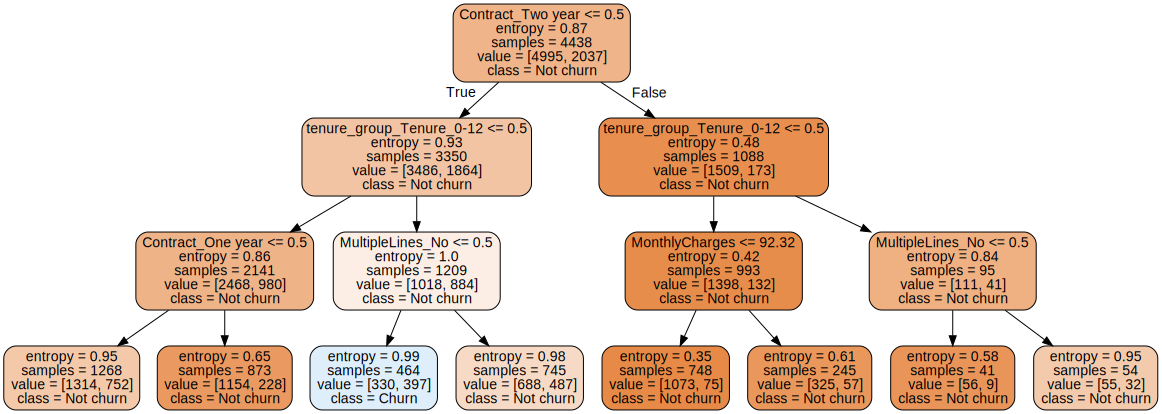

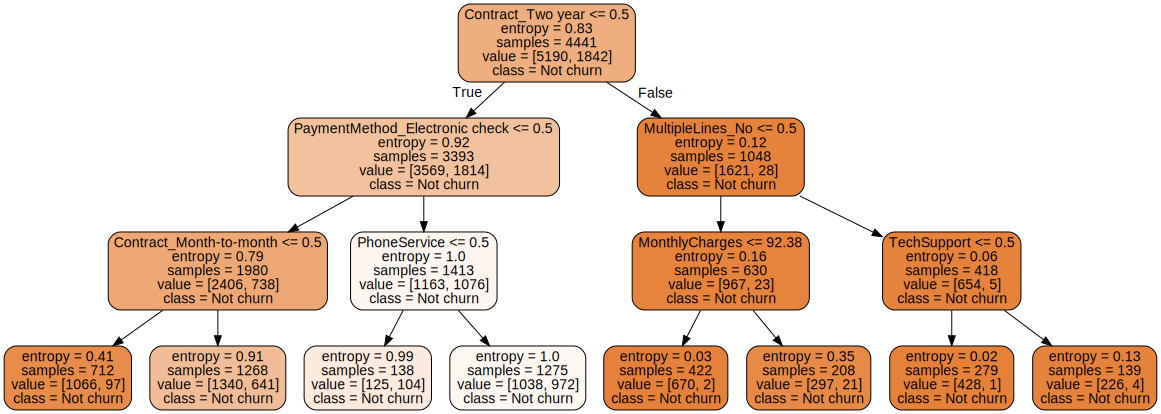

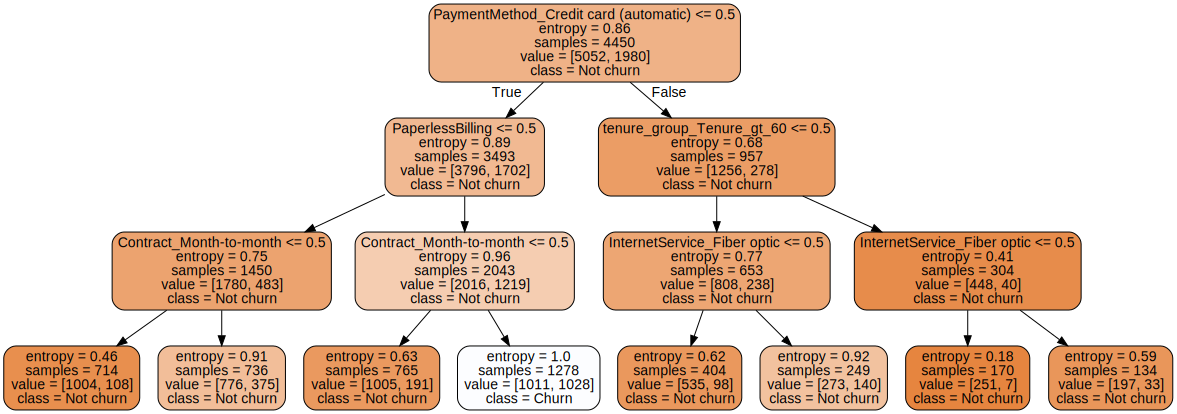

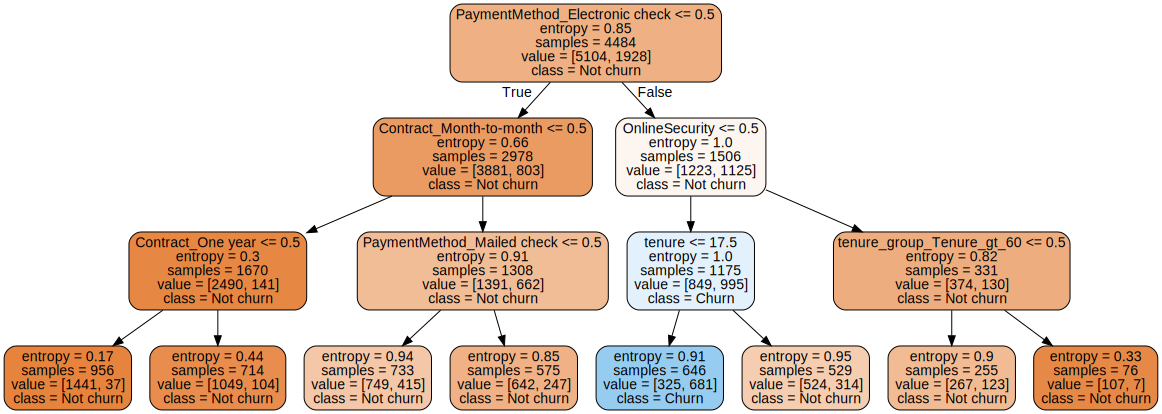

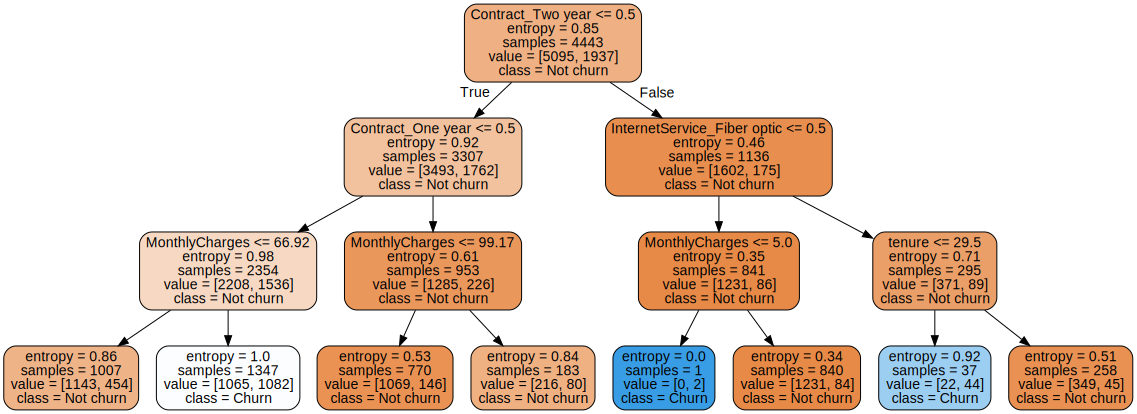

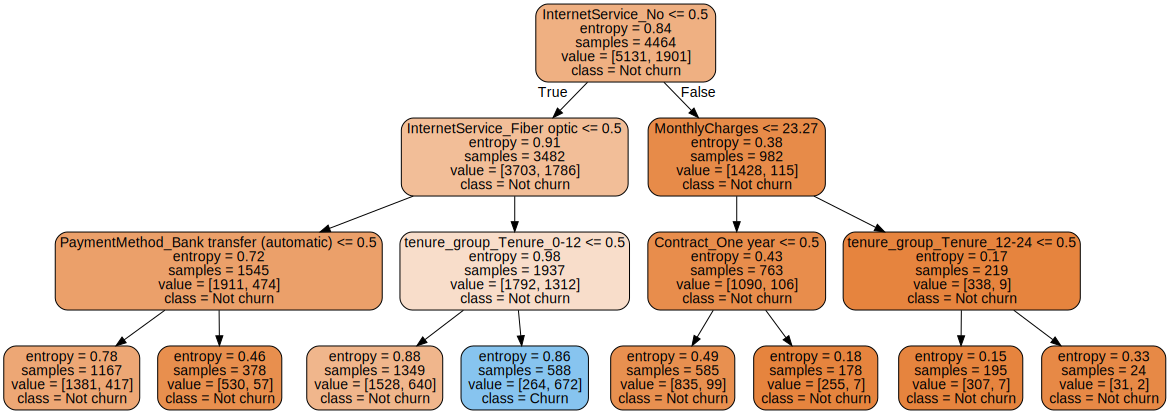

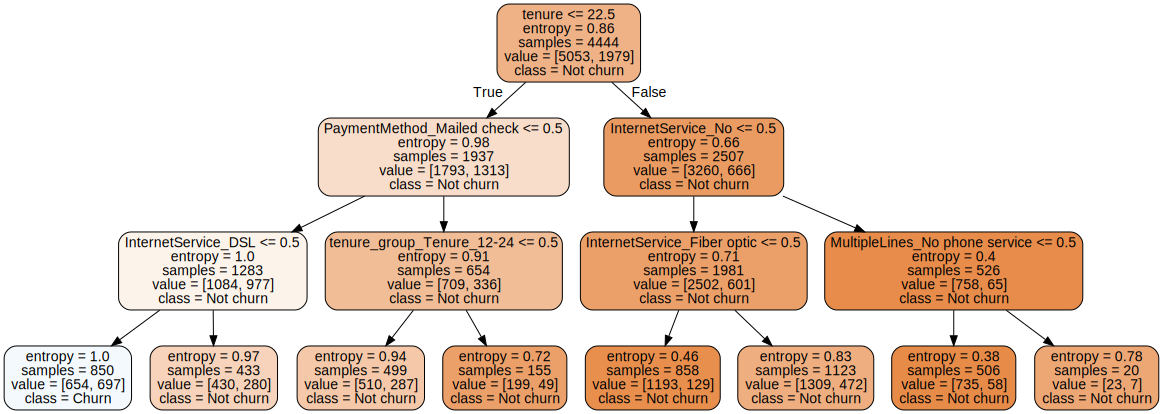

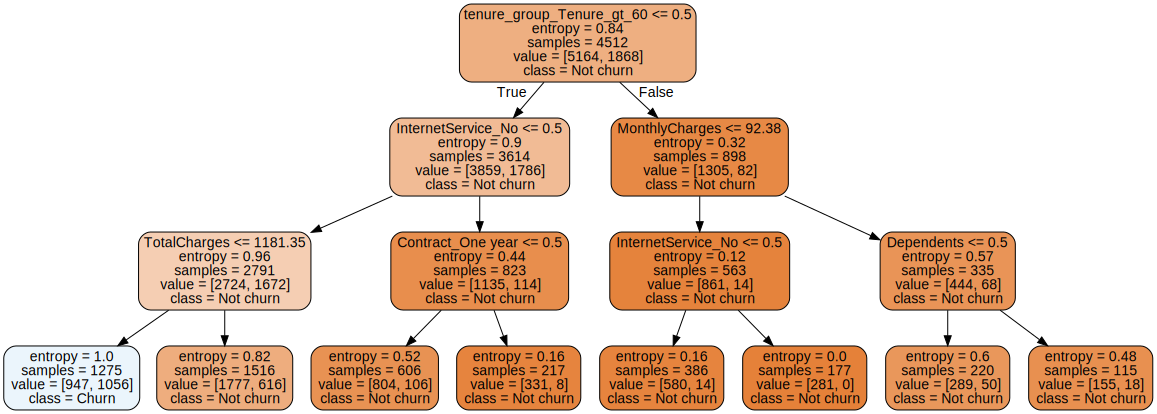

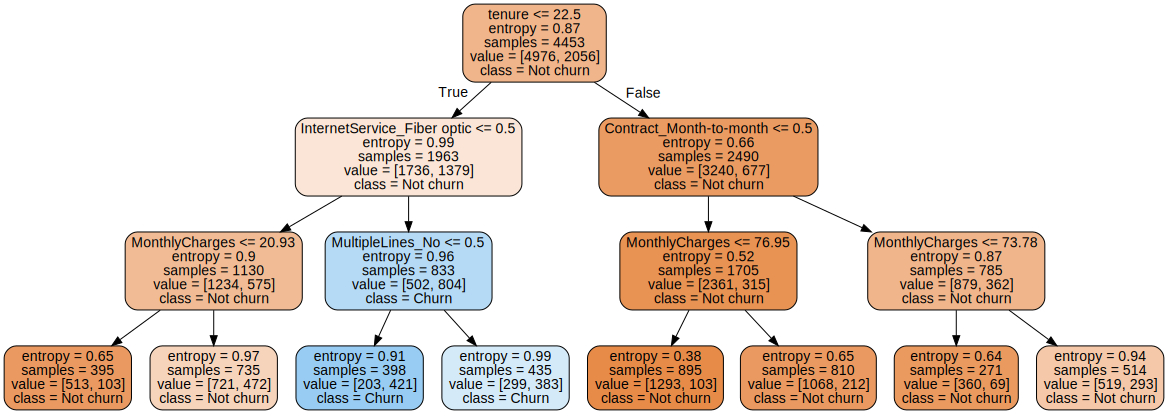

In [28]:
#making 10 trees with random forest.
n = np.arange(0,10).tolist()
cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
for i in n :
    plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

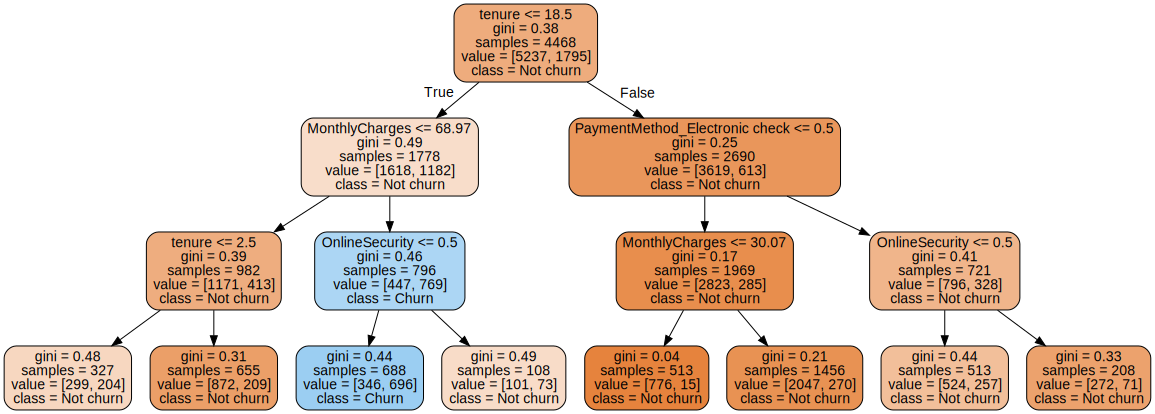

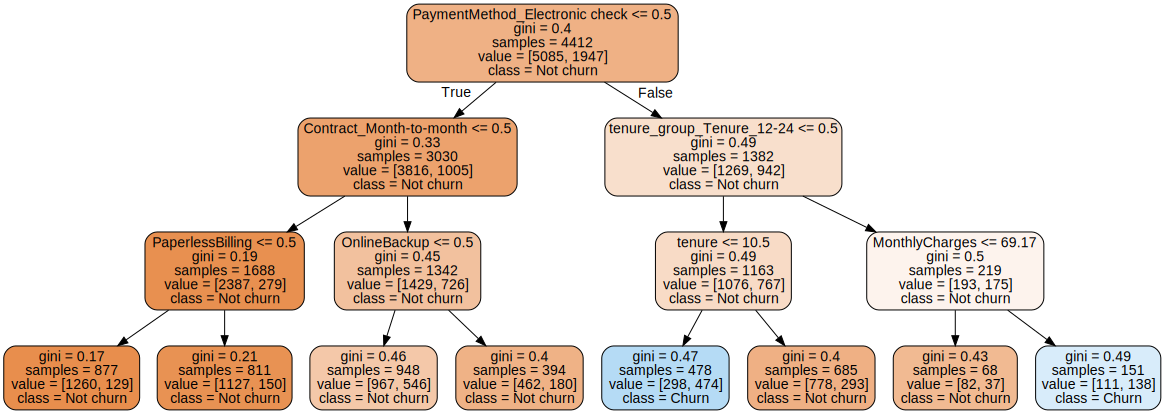

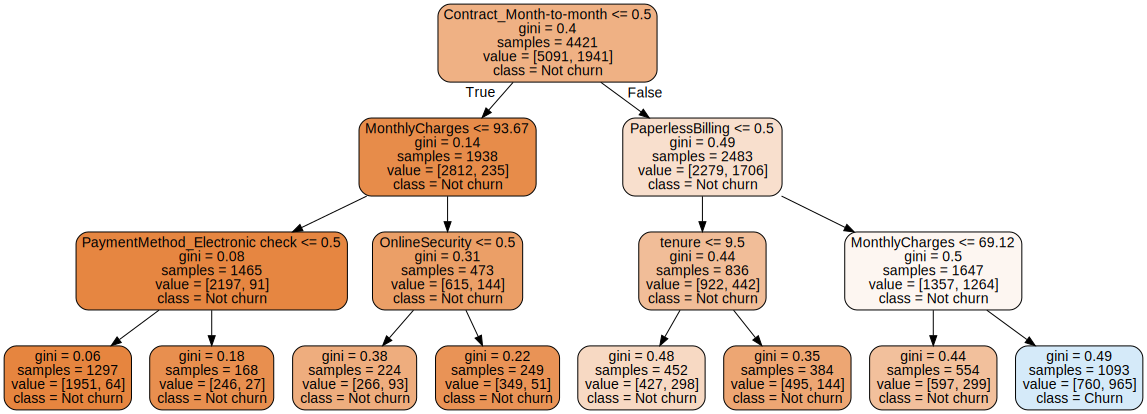

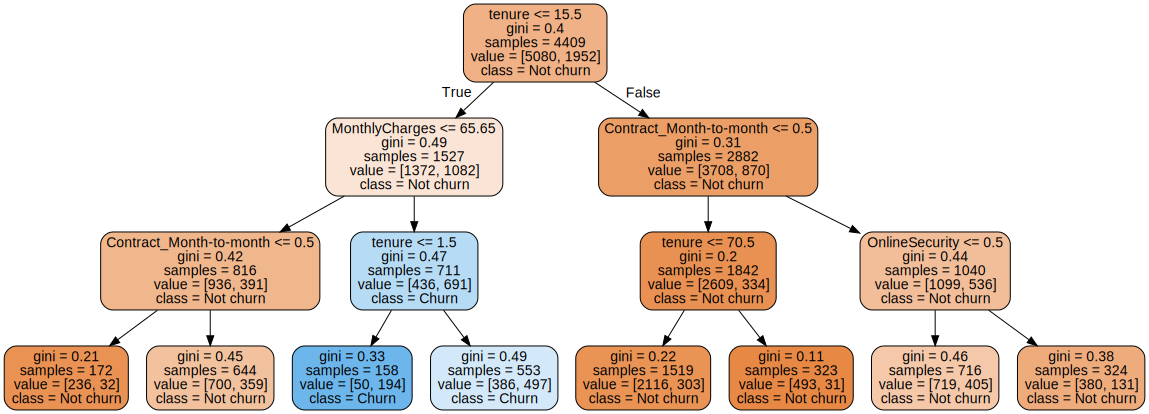

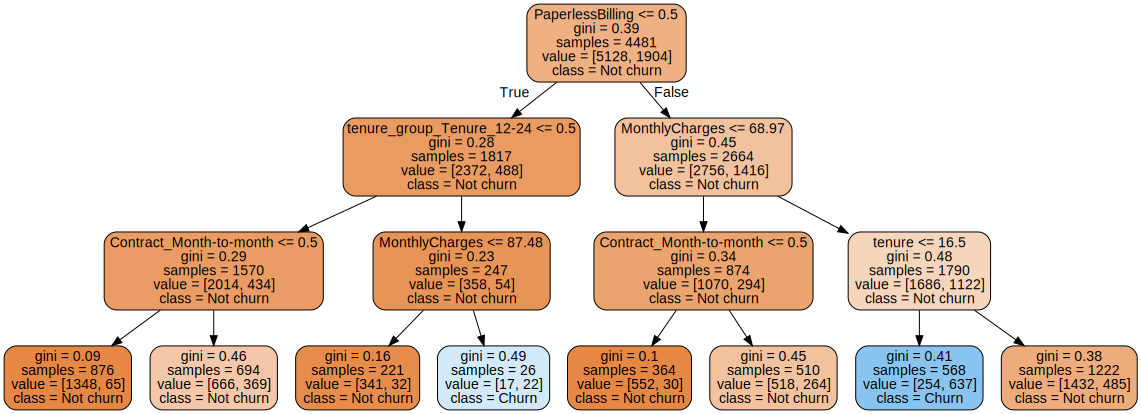

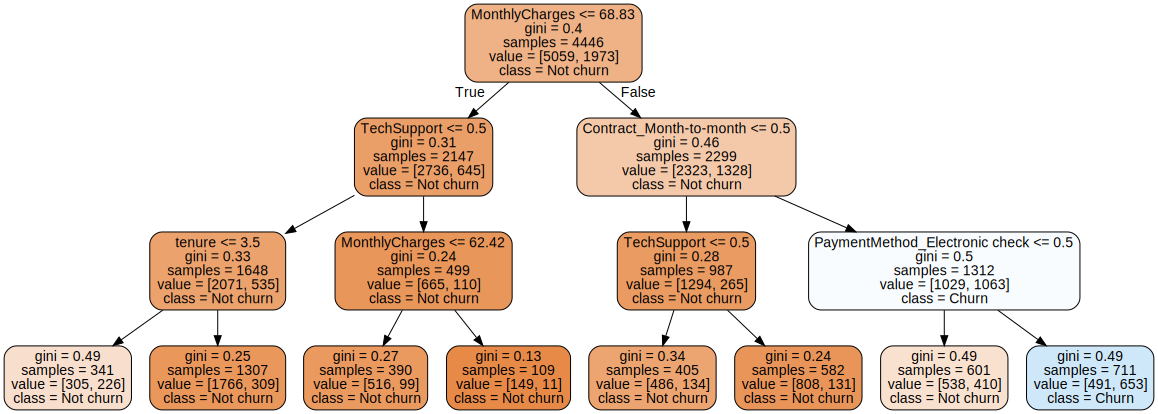

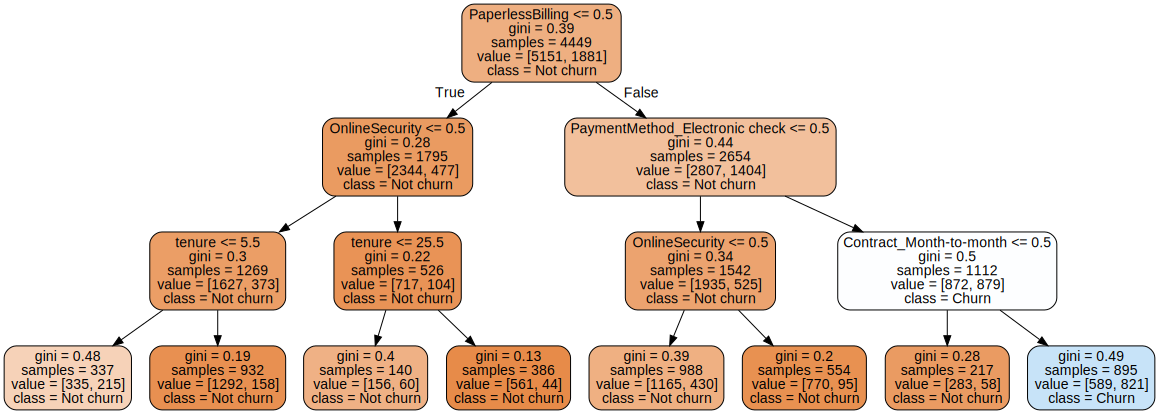

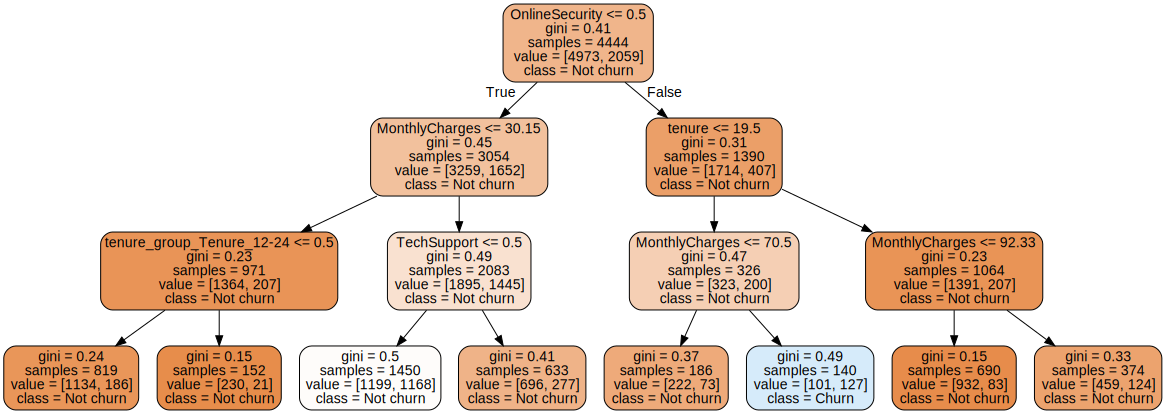

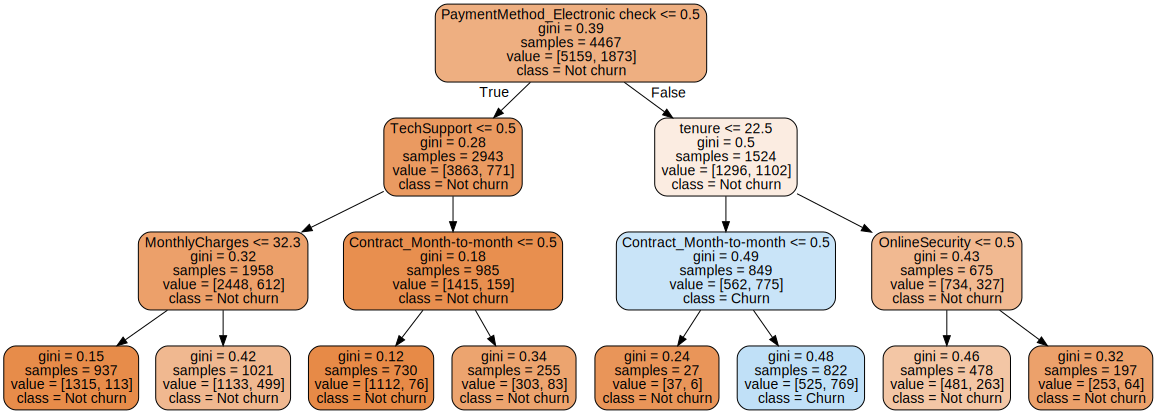

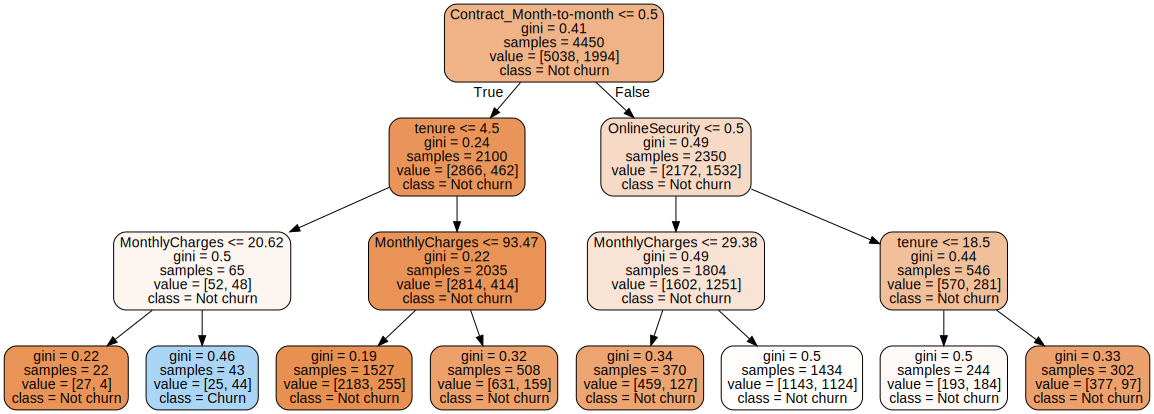

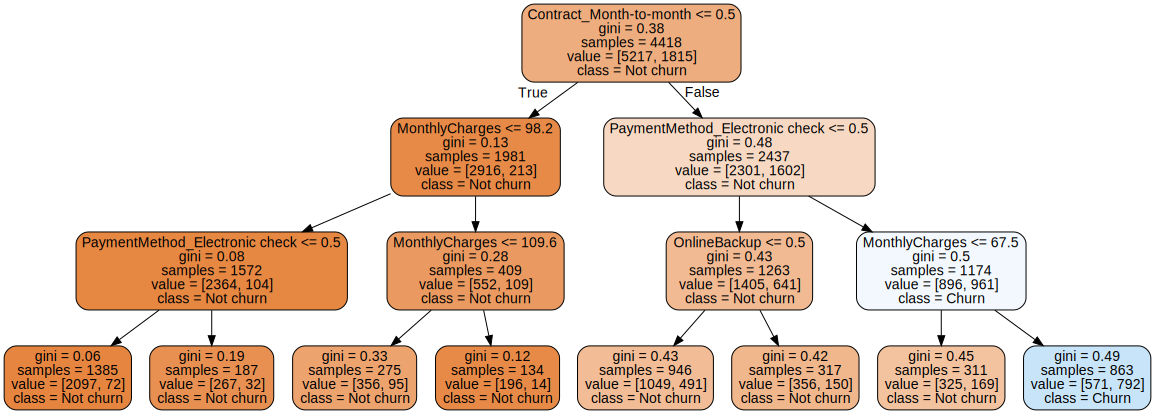

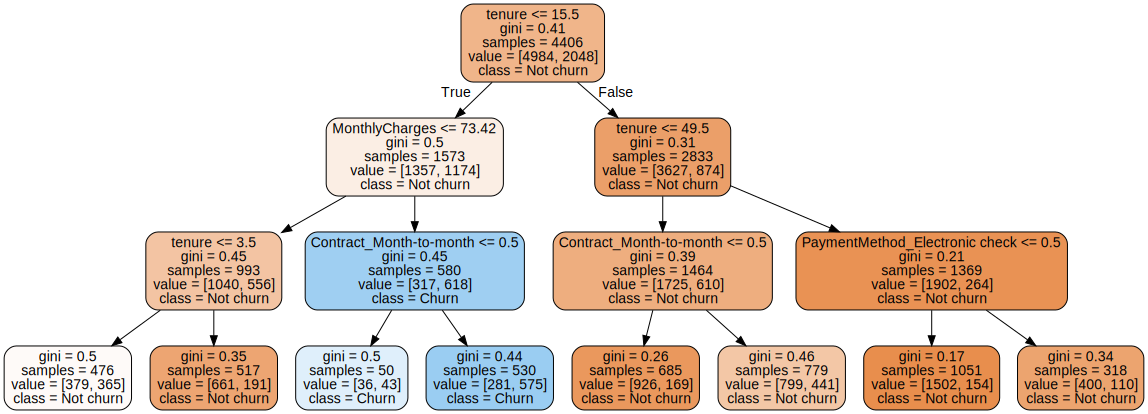

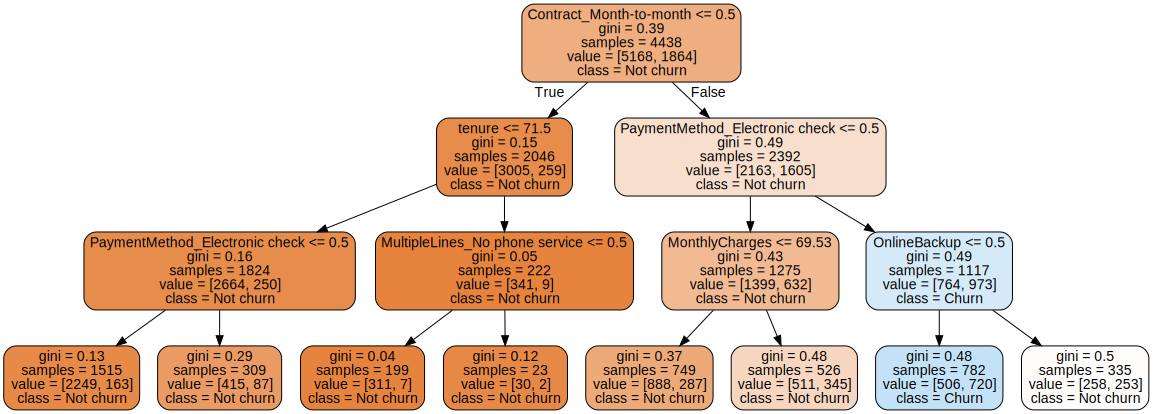

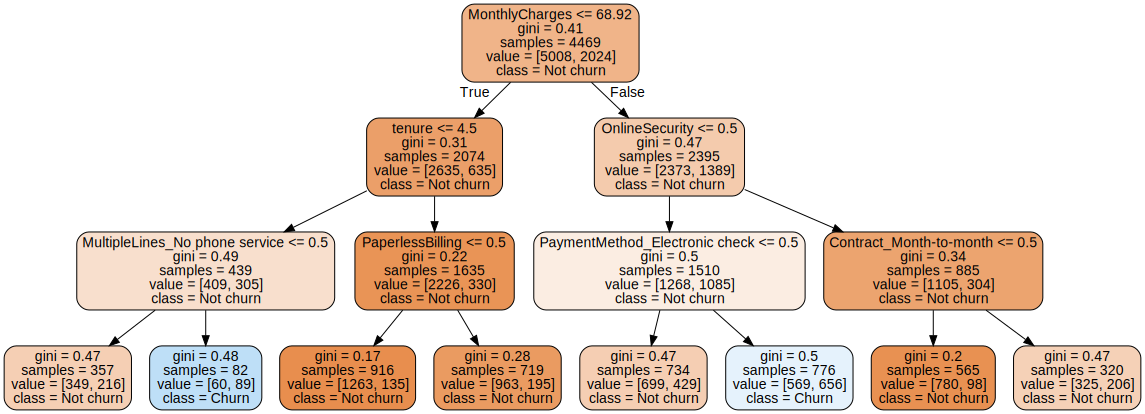

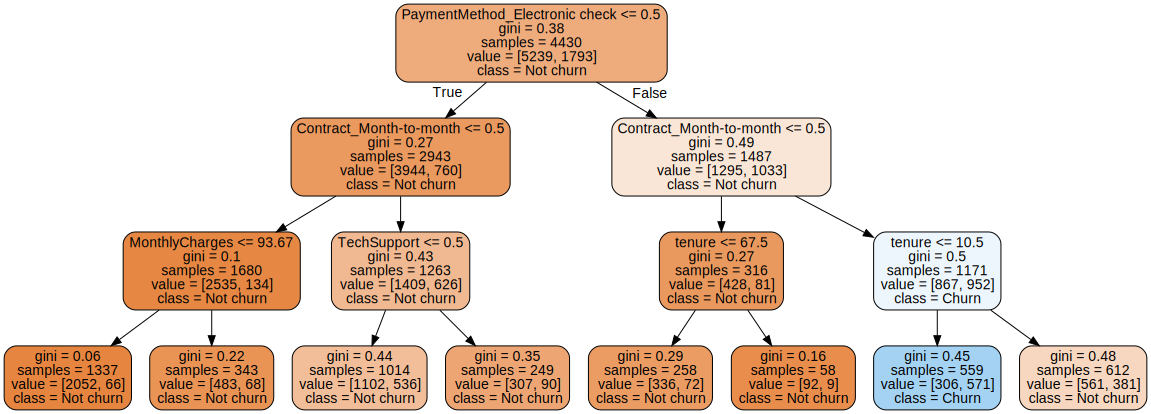

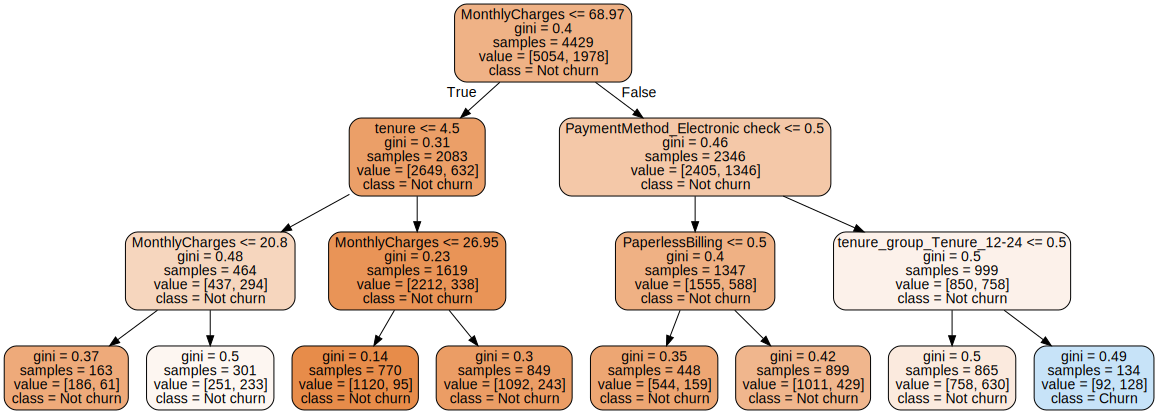

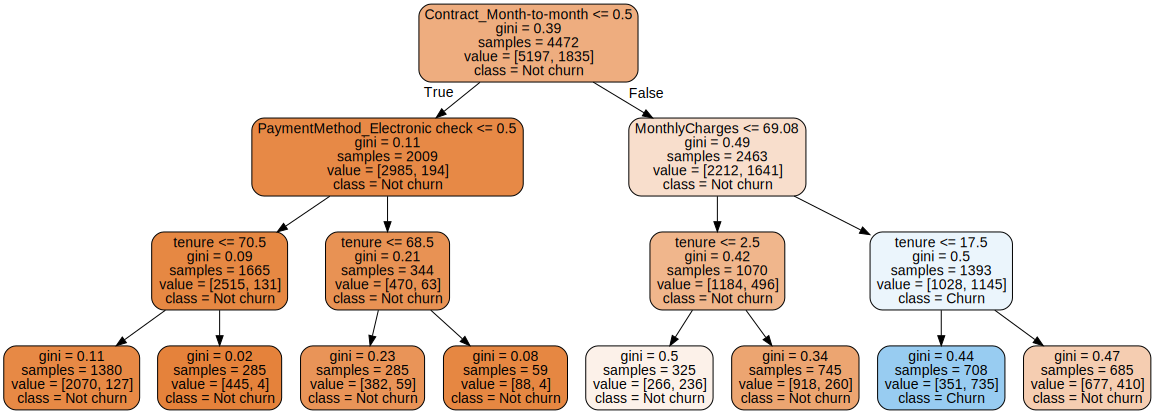

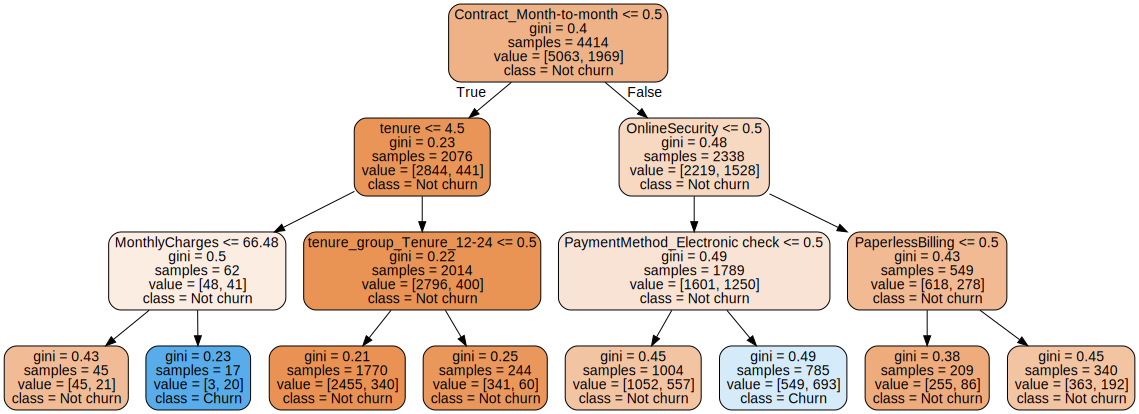

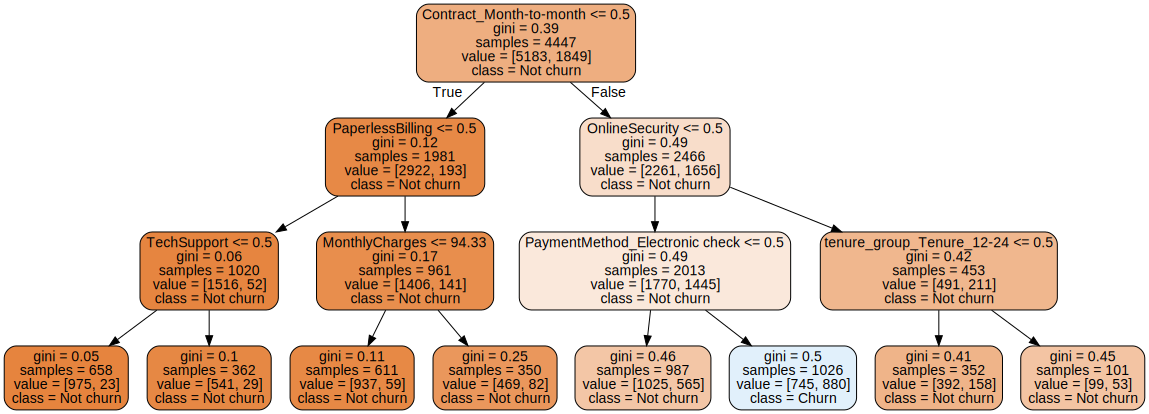

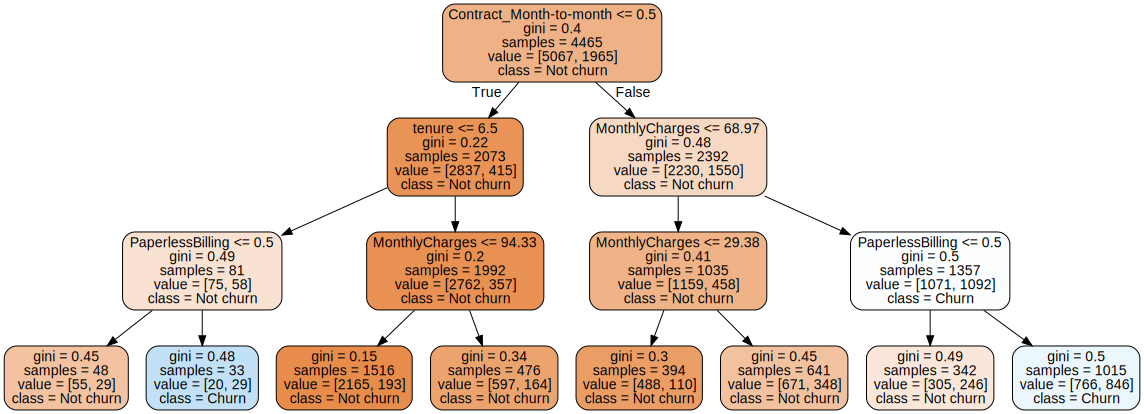

In [29]:
#making 10 trees with random forest for columns 
#selected from recursive feature elimination

n = np.arange(0,10).tolist()
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)


## <a id='5.9'>5.9. Gaussian Naive Bayes.</a>

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report for raw data: 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1268
           1       0.54      0.81      0.64       490

    accuracy                           0.75      1758
   macro avg       0.72      0.77      0.73      1758
weighted avg       0.80      0.75      0.76      1758


 Classification report for syn data: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1232
           1       0.55      0.70      0.62       526

    accuracy                           0.74      1758
   macro avg       0.70      0.73      0.71      1758
weighted avg       0.76      0.74      0.74      1758

Accuracy Score for raw data:  0.7508532423208191
Accuracy Score for syn data:  0.7366325369738339
Area under curve for raw data:  0.7678088585591967
Area under curve for syn data:  0.7271168707718138


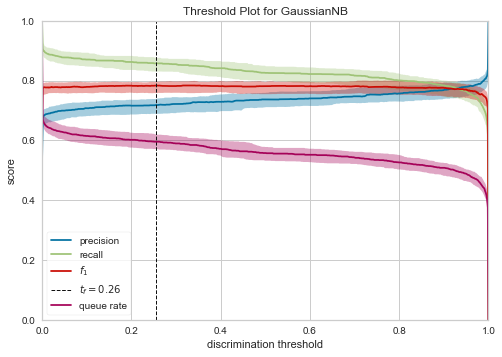

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y)

## <a id='5.10'>5.10. Support Vector Machine</a>
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes 

In [31]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in telcom.columns if i not in Id_col + target_col]
telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                         cols,"coefficients",threshold_plot = False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1268
           1       0.53      0.80      0.64       490

    accuracy                           0.75      1758
   macro avg       0.72      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1232
           1       0.53      0.73      0.62       526

    accuracy                           0.73      1758
   macro avg       0.70      0.73      0.70      1758
weighted avg       0.76      0.73      0.74      1758

Area under curve for raw data :  0

## <a id='5.11'>5.11. Tuning parameters for support vector machine</a>

In [32]:
#tuning parameters
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)

telecom_churn_prediction_alg(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,threshold_plot = False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report for raw data: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1268
           1       0.58      0.46      0.52       490

    accuracy                           0.76      1758
   macro avg       0.69      0.67      0.68      1758
weighted avg       0.74      0.76      0.75      1758


 Classification report for syn data: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      1232
           1       0.60      0.28      0.38       526

    accuracy                           0.73      1758
   macro avg       0.68      0.60      0.60      1758
weighted avg       0.71      0.73      0.69      1758

Accuracy Score for raw data:  0.7571103

## <a id='5.12'>5.12. LightGBMClassifier</a>

In [33]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

cols = [i for i in telcom.columns if i not in Id_col + target_col]
telecom_churn_prediction(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                         syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                         cols,"features",threshold_plot = True)


ModuleNotFoundError: No module named 'lightgbm'

## <a id='5.13'>5.13. XGBoost  Classifier</a>

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report for raw data : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1268
           1       0.59      0.53      0.55       490

    accuracy                           0.76      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.76      0.76      0.76      1758


 Classification report for syn data : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1232
           1

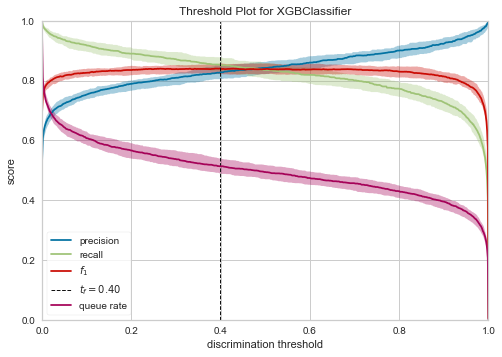

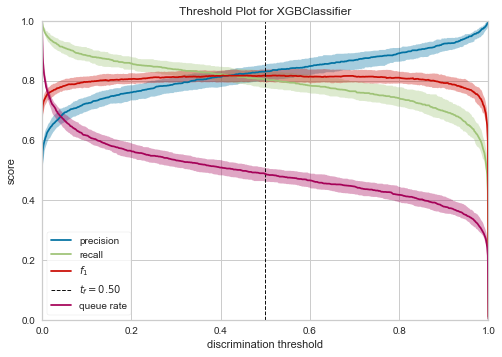

In [34]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                         syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                         cols,"features",threshold_plot = True)

# <a id='6'>6. Model Performances</a>
## <a id='6.1'>6.1. model performance metrics</a>

In [74]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,syn_training_x,syn_testing_x,syn_training_y,syn_testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    model.fit(syn_training_x,syn_training_y)
    syn_predictions  = model.predict(syn_testing_x)
    syn_accuracy     = accuracy_score(syn_testing_y,syn_predictions)
    syn_recallscore  = recall_score(syn_testing_y,syn_predictions)
    syn_precision    = precision_score(syn_testing_y,syn_predictions)
    syn_roc_auc      = roc_auc_score(syn_testing_y,syn_predictions)
    syn_f1score      = f1_score(syn_testing_y,syn_predictions) 
    syn_kappa_metric = cohen_kappa_score(syn_testing_y,syn_predictions)    
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    
    syn_df = pd.DataFrame({"Model"           : [name],
                           "Accuracy_score"  : [syn_accuracy],
                           "Recall_score"    : [syn_recallscore],
                           "Precision"       : [syn_precision],
                           "f1_score"        : [syn_f1score],
                           "Area_under_curve": [syn_roc_auc],
                           "Kappa_metric"    : [syn_kappa_metric],
                          })
    
    return df, syn_df

#outputs for every model
model1, syn_model1 = model_report(logit,train_X,test_X,train_Y,test_Y,syn_train_X,syn_test_X,syn_train_Y,syn_test_Y,
                      "Log. Regr")
model2, syn_model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "Log. Regr(SMOTE)")
model3, syn_model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,syn_train_rf_X,syn_test_rf_X,syn_train_rf_Y,syn_test_rf_Y,
                      "Log. Regr(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4, syn_model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,syn_train_X,syn_test_X,syn_train_Y,syn_test_Y,
                      "Decision Tree")
model5, syn_model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6, syn_model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,syn_train_X,syn_test_X,syn_train_Y,syn_test_Y,
                      "Random Forest")
model7, syn_model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "Naive Bayes")
model8, syn_model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "SVM Linear")
model9, syn_model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "SVM RBF")
model10, syn_model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "LGBM")
model11, syn_model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,syn_os_smote_X,syn_test_X,syn_os_smote_Y,syn_test_Y,
                      "XGBoost")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

syn_model_performances = pd.concat([syn_model1,syn_model2,syn_model3,
                                syn_model4,syn_model5,syn_model6,
                                syn_model7,syn_model8,syn_model9,
                                syn_model10,syn_model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
syn_model_performances = syn_model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))
syn_table  = ff.create_table(np.round(syn_model_performances,4))

py.iplot(table)
py.iplot(syn_table)

## <a id='7'>7. Neural Network</a>

In [85]:
#Using Neural Network for Prediction
from keras.models import Sequential
from keras.layers import Dense

seq = Sequential()
seq.add(Dense(output_dim=11,init='uniform',activation='relu',input_dim=33))
seq.add(Dense(output_dim=11,init='uniform',activation='relu'))
seq.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

seq.fit(os_smote_X,os_smote_Y,batch_size=10,epochs=150)

Epoch 1/150
7790/7790 [==============================] - 1s 136us/step - loss: 0.5131 - acc: 0.7615
Epoch 2/150
7790/7790 [==============================] - 1s 91us/step - loss: 0.4669 - acc: 0.7734
Epoch 3/150
7790/7790 [==============================] - 1s 92us/step - loss: 0.4648 - acc: 0.7751
Epoch 4/150
7790/7790 [==============================] - 1s 95us/step - loss: 0.4648 - acc: 0.7782
Epoch 5/150
7790/7790 [==============================] - 1s 93us/step - loss: 0.4636 - acc: 0.7759
Epoch 6/150
7790/7790 [==============================] - 1s 96us/step - loss: 0.4627 - acc: 0.7754: 0s - loss: 0.4716 - acc: 0.
Epoch 7/150
7790/7790 [==============================] - 1s 111us/step - loss: 0.4640 - acc: 0.7754
Epoch 8/150
7790/7790 [==============================] - 1s 98us/step - loss: 0.4619 - acc: 0.7765
Epoch 9/150
7790/7790 [==============================] - 1s 101us/step - loss: 0.4614 - acc: 0.7792
Epoch 10/150
7790/7790 [==============================] - 1s 94us/step - loss

In [90]:
y_pred = seq.predict(test_X)

#Making y_pred into boolean array
y_pred = (y_pred>0.5)
y_pred = y_pred*1
test_Y = test_Y*1

#Getting the confusion matrix to determine the accuracy
cm = confusion_matrix(test_Y,y_pred)
print("Accuracy:")
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
print(classification_report(test_Y, y_pred))
#The accuracy is  78.35%

0.735494880546075
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1268
           1       0.52      0.77      0.62       490

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.79      0.74      0.75      1758

